<span style="font-size: 14pt">EREVAN, May-June 2017</span>

<span style="font-size: 16pt"> Practice day #1: ES models

<span style="color:blue; font-size: 12pt">Alexey Romanenko </span>,
<span style="color:blue; font-size: 12pt; font-family: 'Verdana'">alexromsput@gmail.com</span>

<h1 align="center">Info</h1> 

This practice task is desinged for improving knowledge of ES models and getting aqcuainted with time series analysis (with python pandas).

The task should take about 3-5 hours to be completed.

<h1 align="center">1. Reading data (10%)</h1>

  * Download data for following data sets
     - 1) <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">monthly-wage.csv </span>(1 TS of monthly wage in Russia)
     - 2) <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">TS_dep36.csv</span> (105 TS of goods sales in shop #36 of one real Retail Net, each TS correspond to an item in shop )
     - 3) <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">TS_dep42.csv</span> (105 TS of goods sales in shop #42 of one real Retail Net, each TS correspond to an item in shop)
     - 4) <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">TS_dep6.csv </span>(110 TS of goods sales in shop #6 of one real Retail Net, each TS correspond to an item in shop)
 
 All data you can find by <a href='https://1drv.ms/f/s!AqGgzb5T4tvShZ1-xS0s6FhP5x-05g'>link</a> 
 
 
 * For each data set: 
      - 1) learn it's structure in csv-file and read it into Pandas data frame (be careful with parsing data)
      - 2) plot time series (for data sets with a lot of TS you need to plot integral sales of all items in shop)
      - 3) answer the questions: is there seasonlaity, trend, changes in level in TS? If there is seasonality then define period of seasonality. 

In [1]:
# start with this code
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utils import qualityRMSE, qualityMedianAE, qualityMACAPE, qualityMAPE
from utils import ExponentialSmoothing
from datetime import datetime, timedelta
import math
import seaborn as sns
sns.set_style("white")

%matplotlib inline


ts_wage = pd.read_csv('./data/monthly-wage.csv', sep=';', decimal='.', index_col='Month', parse_dates=True, dayfirst=True)
ts_dep36 = pd.read_csv('./data/TS_dep36.csv', sep=';', decimal='.', index_col='Timestamp', parse_dates=True, dayfirst=True)
ts_dep42 = pd.read_csv('./data/TS_dep42.csv', sep=';', decimal='.', index_col='Timestamp', parse_dates=True, dayfirst=True)
ts_dep6 = pd.read_csv('./data/TS_dep6.csv', sep=';', decimal='.', index_col='Timestamp', parse_dates=True, dayfirst=True)

#### Time series from Wage data:

In [2]:
ts_wage.head(5)

Real wage
Month                
1993-01-01     100.00
1993-02-01      99.04
1993-03-01     101.77
1993-04-01     110.05
1993-05-01     115.47

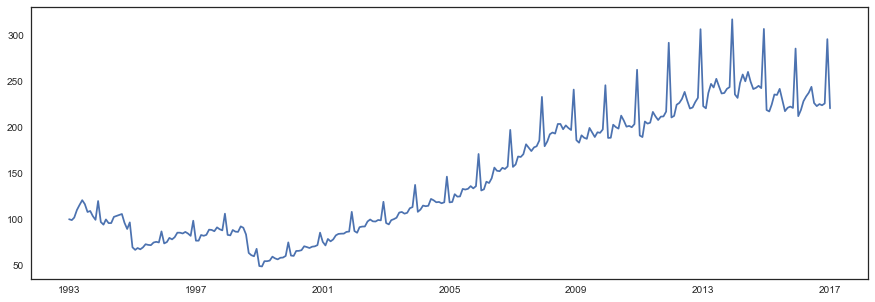

In [3]:
plt.figure(figsize=(15,5))
plt.plot(ts_wage)


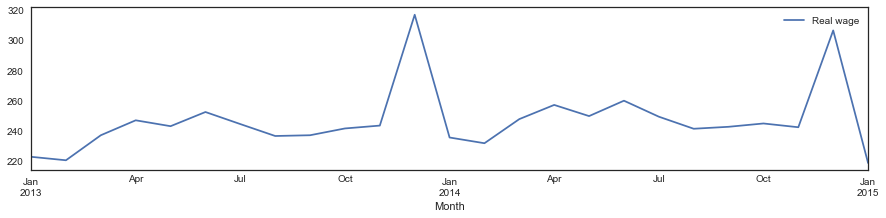

In [4]:
ts_wage['2013-01-01': '2015-01-01'].plot(figsize=(15,3))


Seems there is a monthly seasonality!

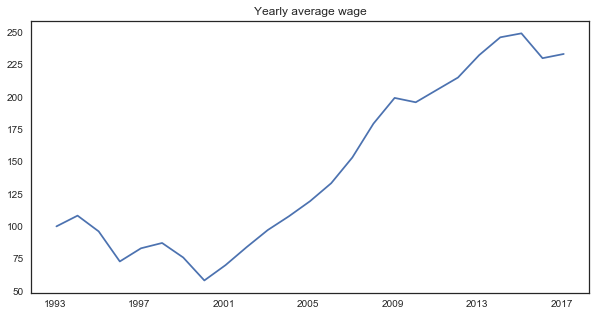

In [5]:
yearly_average = ts_wage.resample('12M').mean()
plt.figure(figsize=(10,5))
plt.plot(yearly_average)
plt.title('Yearly average wage')

#### Time series from dep36 data:

In [6]:
ts_dep36.head(5)

item 1758 item 40010 item 35731 item 96474  item 97519 item 75501  \
Timestamp                                                                      
2005-05-12         0          0      2,484          0         0.0      1,334   
2005-05-13     0,878      0,983      2,632       1,12         1.0      3,514   
2005-05-14     0,332      1,346      2,016      0,302         1.0       2,59   
2005-05-15         0      0,556      0,882          0         4.0      1,708   
2005-05-16     0,438      0,671      0,314      1,486         2.0       2,79   

            item 95519  item 93400  item 99826  item 57813     ...      \
Timestamp                                                      ...       
2005-05-12           1           1         2.0           0     ...       
2005-05-13           4           0         1.0           0     ...       
2005-05-14           0           2         0.0           1     ...       
2005-05-15           1           1         1.0           2     ...       
2005-05-16           3           0         2.0           1     ...       

            item 65825  item 31454  item 29014  item 49139  item 42190  \
Timestamp                                                                
2005-05-12           7          12           0      66,324      32,864   
2005-05-13          16          17           0      69,952      34,024   
2005-05-14          11          12           0      35,366      31,626   
2005-05-15           9          15           0      37,898      43,726   
2005-05-16          11          11           0      49,566      34,548   

            item 8110 item 80718  item 29092  item 76501  item 32258  
Timestamp                                                             
2005-05-12         12         23          63          14         177  
2005-05-13         24         30          97          13          63  
2005-05-14         20          0          80          12          94  
2005-05-15         20          0          64           6         105  
2005-05-16         23          0          43           4          51  

[5 rows x 105 columns]

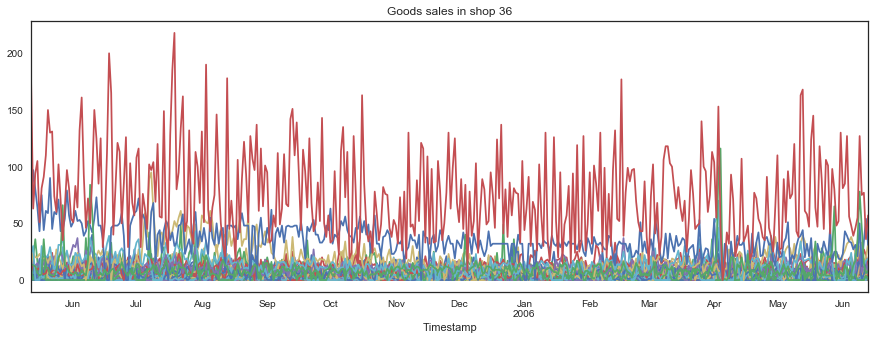

In [7]:
ts_dep36.plot(figsize=(15,5),title="Goods sales in shop 36",legend=False)

#### Time series from dep42 data:

In [8]:
ts_dep42.head(10)

item 558  item 834  item 883  item 1311  item 1396  item 1647  \
Timestamp                                                                   
2005-10-03       NaN       NaN       NaN        NaN        NaN        NaN   
2005-10-04       NaN       NaN       NaN        NaN        NaN        NaN   
2005-10-05       NaN       NaN       NaN        NaN        NaN        NaN   
2005-10-06       NaN       NaN       NaN        NaN        NaN        NaN   
2005-10-07       NaN       NaN       NaN        NaN        NaN        NaN   
2005-10-08       NaN       NaN       NaN        NaN        NaN        NaN   
2005-10-09       NaN       NaN       NaN        NaN        NaN        NaN   
2005-10-10       NaN       NaN       NaN        NaN        NaN        NaN   
2005-10-11  0.992568       NaN       NaN        NaN        NaN        NaN   
2005-10-12  0.638689       NaN       NaN        NaN        NaN        NaN   

            item 1689  item 1761  item 1969  item 2036     ...      \
Timestamp                                                  ...       
2005-10-03        NaN        NaN        NaN        NaN     ...       
2005-10-04        NaN        NaN        NaN        NaN     ...       
2005-10-05        NaN        NaN        NaN        NaN     ...       
2005-10-06        NaN        NaN        NaN        NaN     ...       
2005-10-07        NaN        NaN        NaN        NaN     ...       
2005-10-08        NaN        NaN        NaN        NaN     ...       
2005-10-09        NaN        NaN        NaN        NaN     ...       
2005-10-10        NaN        NaN        NaN        NaN     ...       
2005-10-11        NaN        NaN        1.0        NaN     ...       
2005-10-12        NaN        NaN        4.0        NaN     ...       

            item 77539  item 79279  item 80510  item 82356  item 87639  \
Timestamp                                                                
2005-10-03         NaN         NaN         NaN         NaN         NaN   
2005-10-04         NaN         NaN         NaN         NaN         NaN   
2005-10-05         NaN         NaN         NaN         NaN         NaN   
2005-10-06         NaN         NaN         NaN         NaN         NaN   
2005-10-07         NaN         NaN         NaN         NaN         NaN   
2005-10-08         NaN         NaN         NaN         NaN         NaN   
2005-10-09         NaN         NaN         NaN         NaN         NaN   
2005-10-10         NaN         NaN         NaN         NaN         NaN   
2005-10-11         NaN         NaN         NaN         NaN         NaN   
2005-10-12         NaN         NaN         NaN         NaN         NaN   

            item 88121  item 89103  item 89977  item 95417  item 96668  
Timestamp                                                               
2005-10-03         NaN         NaN         NaN         NaN         NaN  
2005-10-04         NaN         NaN         NaN         NaN         NaN  
2005-10-05         NaN         NaN         NaN         NaN         NaN  
2005-10-06         NaN         NaN         NaN         NaN         NaN  
2005-10-07         NaN         NaN         NaN         NaN         NaN  
2005-10-08         NaN         NaN         NaN         NaN         NaN  
2005-10-09         NaN         NaN         NaN         NaN         NaN  
2005-10-10         NaN         NaN         NaN         NaN         NaN  
2005-10-11         NaN         NaN         NaN         NaN         NaN  
2005-10-12         NaN         NaN         NaN         NaN         NaN  

[10 rows x 155 columns]

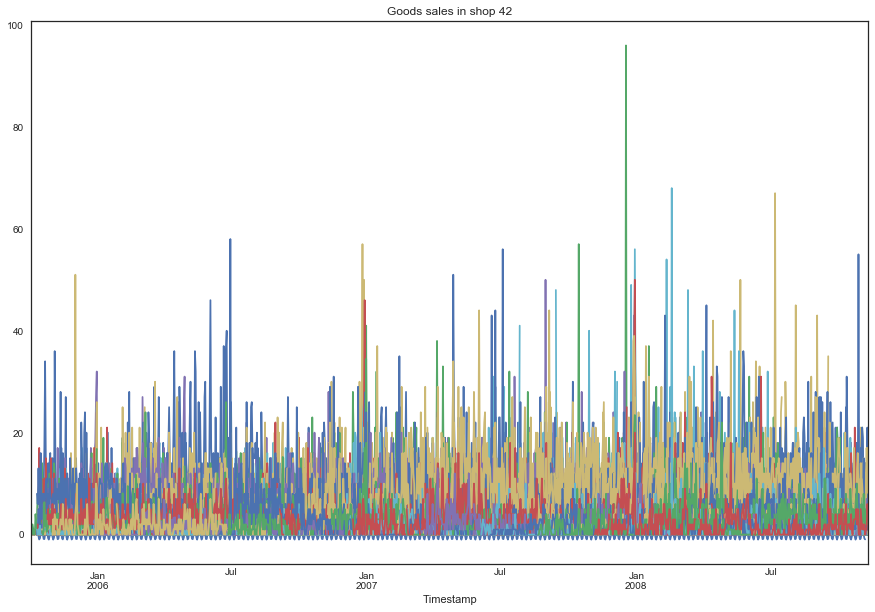

In [9]:
ts_dep42.plot(figsize=(15,10),title="Goods sales in shop 42",legend=False)

#### Time series from dep6 data:

In [10]:
ts_dep6.head(10)

item 1089  item 10960  item 1178  item 11827  item 1511  \
Timestamp                                                             
2006-11-01        1.0         2.0        0.0         3.0        3.0   
2006-11-02        2.0         2.0        4.0         0.0        0.0   
2006-11-03        4.0         4.0        1.0         3.0        3.0   
2006-11-04        0.0         3.0        2.0         1.0        1.0   
2006-11-05        4.0         8.0        1.0         2.0        1.0   
2006-11-06        0.0         3.0        1.0         2.0        0.0   
2006-11-07        0.0         3.0        1.0         2.0        1.0   
2006-11-08        0.0         2.0        3.0         1.0        1.0   
2006-11-09        1.0         1.0        1.0         9.0        5.0   
2006-11-10        6.0         0.0        2.0         3.0        3.0   

            item 15934  item 16368  item 17248  item 18232  item 18291  \
Timestamp                                                                
2006-11-01         0.0         0.0         2.0         3.0         4.0   
2006-11-02         1.0         0.0         5.0         1.0         6.0   
2006-11-03         1.0         0.0         5.0         6.0         7.0   
2006-11-04         0.0         2.0         1.0         1.0         7.0   
2006-11-05         1.0         2.0         6.0         5.0         6.0   
2006-11-06         2.0         0.0         2.0         2.0         9.0   
2006-11-07         0.0         2.0         6.0         3.0         3.0   
2006-11-08         NaN        12.0         4.0         2.0         2.0   
2006-11-09         0.0         0.0         2.0         2.0        11.0   
2006-11-10         2.0         1.0         4.0         2.0         4.0   

               ...      item 89787  item 91285  item 91845  item 93627  \
Timestamp      ...                                                       
2006-11-01     ...             3.0         NaN         NaN         NaN   
2006-11-02     ...             4.0         NaN         NaN         NaN   
2006-11-03     ...             0.0         NaN         NaN         NaN   
2006-11-04     ...             3.0         NaN         NaN         NaN   
2006-11-05     ...             6.0         NaN         NaN         NaN   
2006-11-06     ...             1.0         NaN         NaN         NaN   
2006-11-07     ...             2.0         NaN         NaN         NaN   
2006-11-08     ...             1.0         NaN         NaN         NaN   
2006-11-09     ...             3.0         NaN         NaN         NaN   
2006-11-10     ...             2.0         NaN         NaN         NaN   

            item 93634  item 96260  item 96880  item 97952  item 99146  \
Timestamp                                                                
2006-11-01         NaN         NaN         NaN         NaN         NaN   
2006-11-02         NaN         NaN         NaN         NaN         NaN   
2006-11-03         NaN         NaN         NaN         NaN         NaN   
2006-11-04         NaN         NaN         NaN         NaN         NaN   
2006-11-05         NaN         NaN         NaN         NaN         NaN   
2006-11-06         NaN         NaN         NaN         NaN         NaN   
2006-11-07         NaN         NaN         NaN         NaN         NaN   
2006-11-08         NaN         NaN         NaN         NaN         NaN   
2006-11-09         NaN         NaN         NaN         NaN         NaN   
2006-11-10         NaN         NaN         NaN         NaN         NaN   

            item 99147  
Timestamp               
2006-11-01         NaN  
2006-11-02         NaN  
2006-11-03         NaN  
2006-11-04         NaN  
2006-11-05         NaN  
2006-11-06         NaN  
2006-11-07         NaN  
2006-11-08         NaN  
2006-11-09         NaN  
2006-11-10         NaN  

[10 rows x 110 columns]

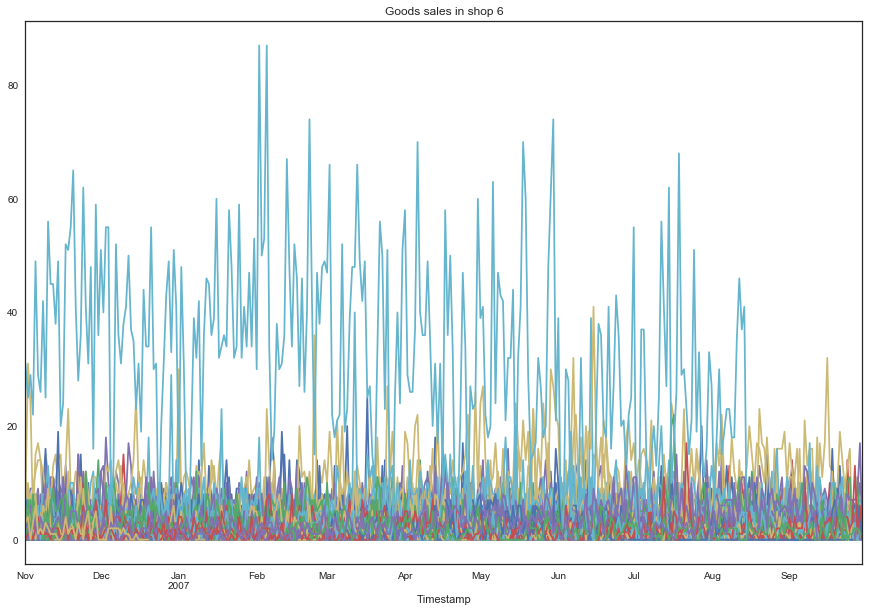

In [11]:
ts_dep6.plot(figsize=(15,10),title="Goods sales in shop 6",legend=False)

<h1 align="center">2. Apply Simple ES to data without trend and Seasonality (15%) </h1>
You need to apply SES (IES see seminar 2) model for TS <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">monthly-wage.csv</span>.

Forecast delay $h=1$ for all point in this task.

 * 1) Find the best param $\alpha$ of SES for data period from 09.1998 to 01.2015. Is the optimal value close to 0 or 1? (You can choose any loss function from seminar 2).
 * 2) Draw forecast with optimial value $\alpha$ for data from 09.1998 to 01.2017. Conclude whether SES can be used for this TS? If can not than explain why.
 * 3) Calculate accuracy of the forecast of TS in [02.2016, 01.2017].
 * 4) Aggregate original TS by Years (time step chould be 1 year). Repeat point 1)-2) for aggregated TS.

##### *some auxiliary functions

In [12]:
## empty forecast data createion as time series
def empty_frc(data,delay):
    ix = range(len(data.index))
    start = data.index[-1]+timedelta(1)
    end = data.index[-1]+timedelta(delay)
    additional_range = pd.date_range(start,end)
    frc_ts = pd.DataFrame(index = data.index.append(additional_range),
                          columns = data.columns)
    return frc_ts
    
## auxilary function to prepare dataframe with all predictions
def all_frc_data_creation(predicted_data, true_data):
    
    data_columns = []
    for columns in predicted_data.keys():
        data_columns.append(columns)
    data_columns.append(true_data.columns.all())

    data_data = []
    true_data_values = true_data.values.reshape(-1)
    for values in predicted_data.values():
        data_data.append(values.values.reshape(-1))
    data_data = np.array(data_data).transpose()
    
    if data_data.shape[0] > true_data_values.shape[0]:
        size = data_data.shape[0] - true_data_values.shape[0]
        add = np.ones(size)*np.nan
        true_data_values = np.hstack((true_data_values,add))
        data_data = np.column_stack((data_data,true_data_values))
    elif data_data.shape[0] == true_data_values.shape[0]:
        data_data = np.column_stack((data_data,true_data_values))

    data_index = predicted_data[data_columns[0]].index
    data = pd.DataFrame(data=data_data, index=data_index, columns=data_columns)
    return data 

## only optimal forecast
def optimal_forecast(data,method,parameters,delay):
    forecast_ts = empty_frc(data,delay)
    for cntr in data.columns:
        forecast_ts[cntr] = method(data[cntr], delay, parameters)
    return forecast_ts

### 2.1 Optimal Alpha finding

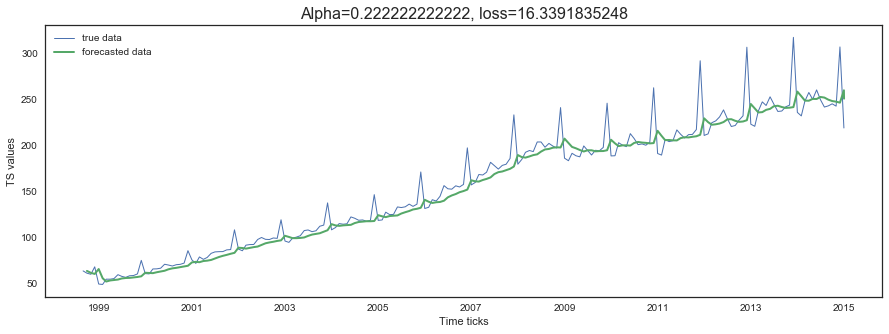

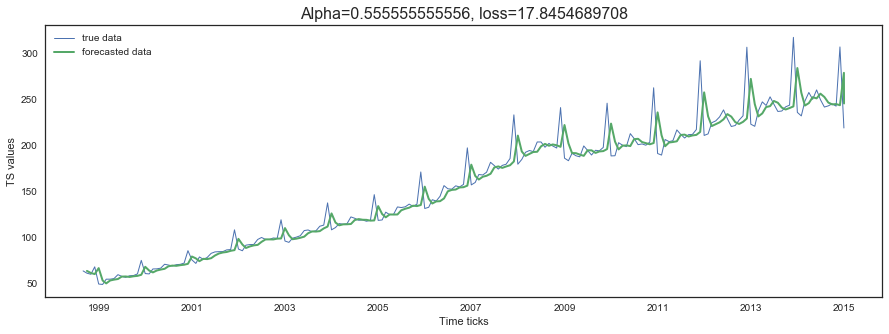

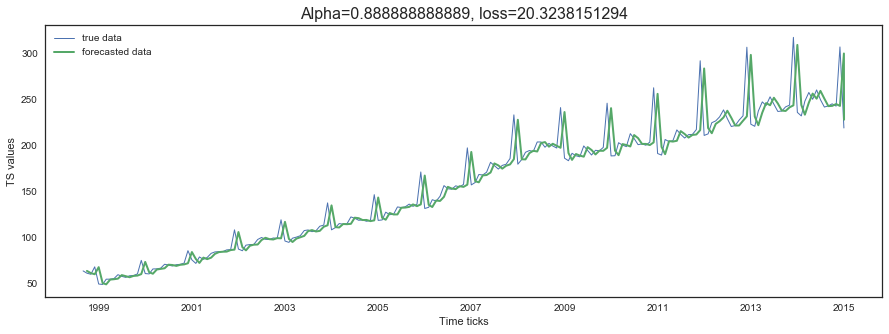

In [13]:
train_ts_wage = ts_wage.loc['1998-09-01': '2015-01-01']
delay=1
ALPHA = list(np.linspace(start=0,stop=1,num=10))
FRC_TS_ES_wage = {}
AP = 10
ix = range(len(train_ts_wage.index))

loss_matrix = np.zeros((len(ALPHA),2))
i = 0

for alpha in ALPHA:
    Params = {}
    frc_ts = empty_frc(data=train_ts_wage,delay=delay)
    Params['alpha']=alpha
    Params['AdaptationPeriod']=AP
    for cntr in train_ts_wage.columns:
        frc_ts[cntr] = ExponentialSmoothing(train_ts_wage[cntr], delay, Params)
    FRC_TS_ES_wage['ES alpha %.2f' % alpha] = frc_ts
    
    loss,_ = qualityRMSE(train_ts_wage.iloc[ix], frc_ts.iloc[ix])
    
    loss_matrix[i][0] = loss_matrix[i][0] + alpha
    loss_matrix[i][1] = loss_matrix[i][0] + loss
    i = i + 1
    
    if i % 3 == 0:
        title = ''
        title = 'Alpha=' + str(alpha) +', loss=' + str(loss.values[0])
        plt.figure(figsize=(15,5))
        plt.plot(train_ts_wage,linewidth=1.0,label='true data')
        plt.plot(frc_ts,linewidth=2.0, label='forecasted data')
        plt.legend()
        plt.xlabel("Time ticks")
        plt.ylabel("TS values")
        plt.title(title, fontsize=16)

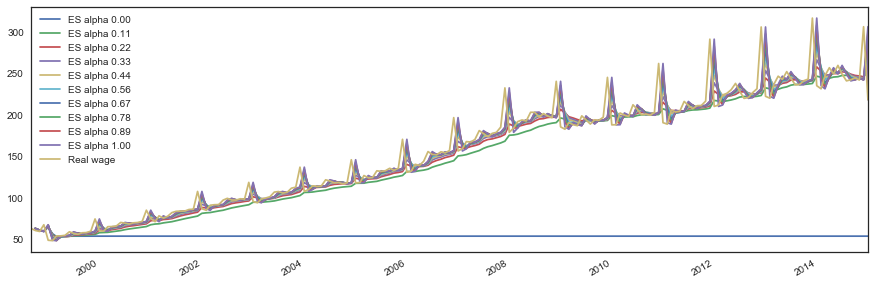

In [14]:
all_frc_data_creation(FRC_TS_ES_wage,train_ts_wage).plot(figsize=(15,5))

In [15]:
min_loss = np.min(loss_matrix[:,1])
index = np.argmin(loss_matrix[:,1])
optimal_alpha = loss_matrix[index][0]
optimal_alpha

0.22222222222222221

##### Conclusion: 
Mathematically loss is minimal, when alpha is around 2 ~ 2.5.

The best similarity alpha is around 8.5 ~ 9.


In [16]:
delay = 1
adaptation_period = 10
Params_optimal={'alpha':optimal_alpha,'AdaptationPeriod':adaptation_period}
Params_similar={'alpha':0.9,'AdaptationPeriod':adaptation_period}

optimal_wage_forecast = optimal_forecast(ts_wage,ExponentialSmoothing,
                                         Params_optimal,delay)
similar_wage_forecast = optimal_forecast(ts_wage,ExponentialSmoothing,
                                         Params_similar,delay)

### 2.2 Plotting optimal forecast, similar forecast and real data:

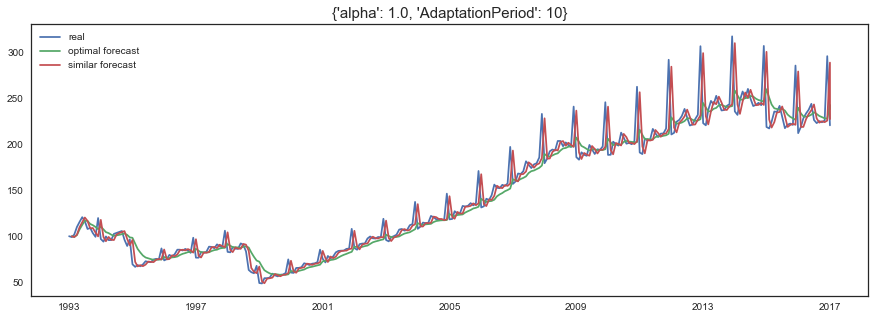

In [17]:
plt.figure(figsize=(15,5))
plt.plot(ts_wage, label='real')
plt.plot(optimal_wage_forecast, label='optimal forecast')
plt.plot(similar_wage_forecast, label='similar forecast' )
plt.title(Params,fontsize=15)
plt.legend()

### 2.3 Accuracy of optimal Alpha

In [18]:
testing_forecast = optimal_wage_forecast['2016-01-01':'2017-01-01']
testing_real = ts_wage['2016-01-01':'2017-01-01']
ix = range(len(testing_forecast.index))

loss, _ =  qualityMACAPE(testing_real.iloc[ix], testing_forecast.iloc[ix])
accuracy = 1 - loss
print('Accuracy =','{:0.2f}%'.format(accuracy.values[0]*100))

Accuracy = 93.96%


### 2.4 Solution for aggregeated data

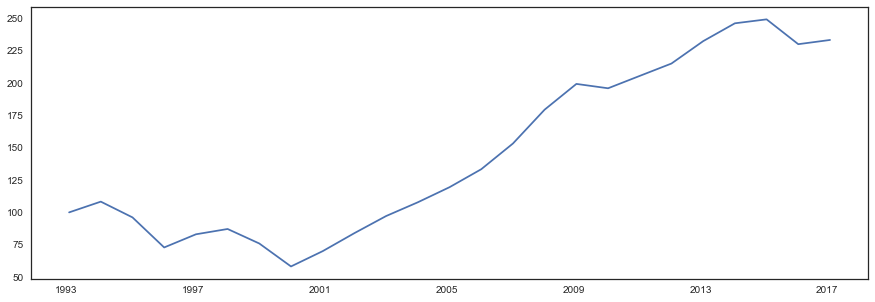

In [19]:
ts_wage_aggregated = ts_wage.resample('12M').mean()
plt.figure(figsize=(15,5))
plt.plot(ts_wage_aggregated)

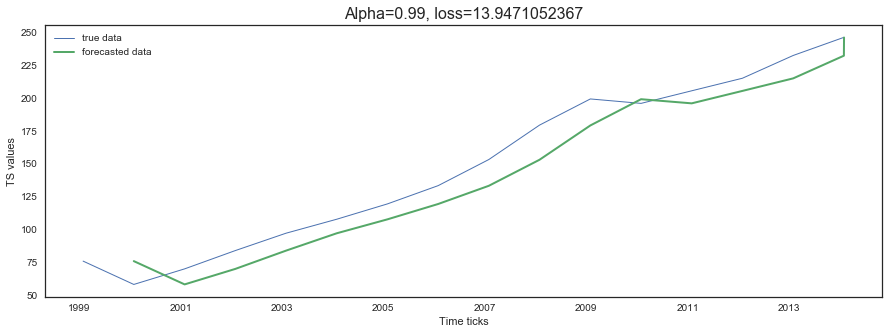

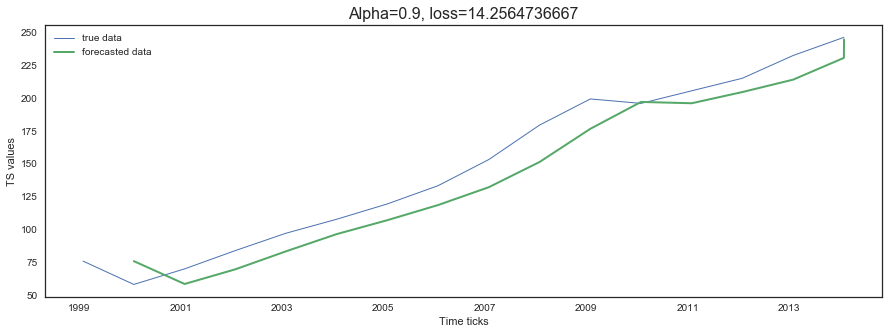

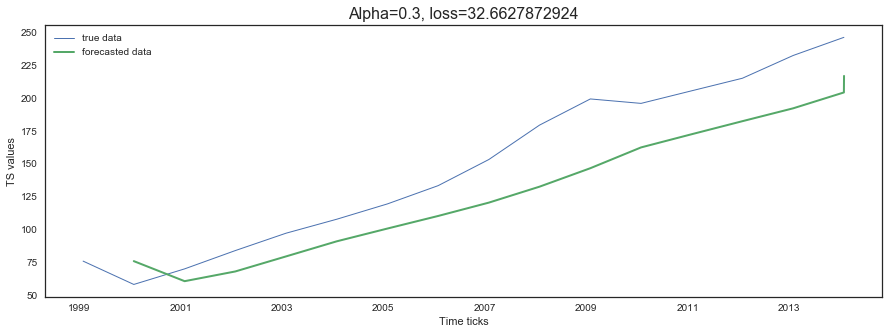

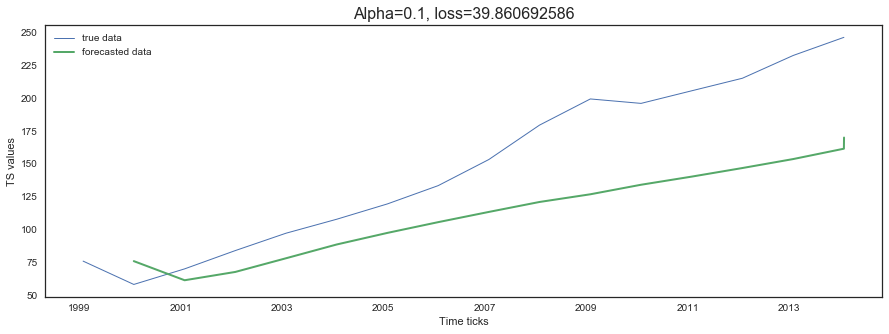

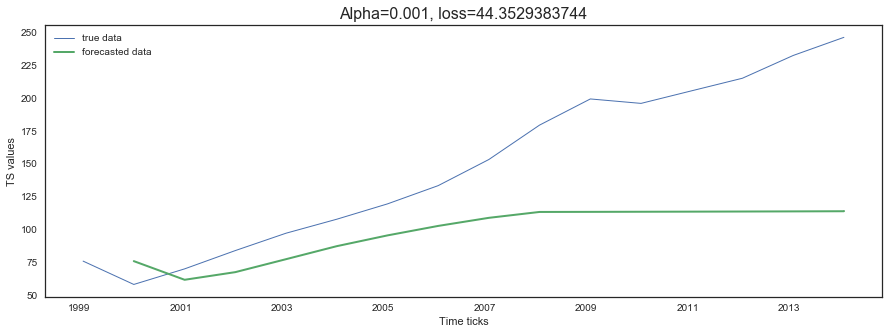

In [20]:
train_ts_wage_ag = ts_wage_aggregated.loc['1998-09-01': '2015-01-01']
ALPHA = [0.99,0.9,0.3,0.1,0.001]
delay = 1 
FRC_TS_ES_wage_ag = {}
AP = 10
ix = range(len(train_ts_wage_ag.index))

for alpha in ALPHA:
    Params = {}
    frc_ts = empty_frc(data=train_ts_wage_ag,delay=delay)
    Params['alpha']=alpha
    Params['AdaptationPeriod']=AP
    for cntr in train_ts_wage_ag.columns:
        frc_ts[cntr] = ExponentialSmoothing(train_ts_wage_ag[cntr], delay, Params)
    FRC_TS_ES_wage_ag['ES alpha %.2f' % alpha] = frc_ts
    
    loss,_ = qualityMedianAE(train_ts_wage_ag.iloc[ix], frc_ts.iloc[ix])
    title = ''
    title = 'Alpha=' + str(alpha) +', loss=' + str(loss.values[0])
    
    plt.figure(figsize=(15,5))
    plt.plot(train_ts_wage_ag,linewidth=1.0,label='true data')
    plt.plot(frc_ts,linewidth=2.0, label='forecasted data')
    plt.legend()
    plt.xlabel("Time ticks")
    plt.ylabel("TS values")
    plt.title(title, fontsize=16)

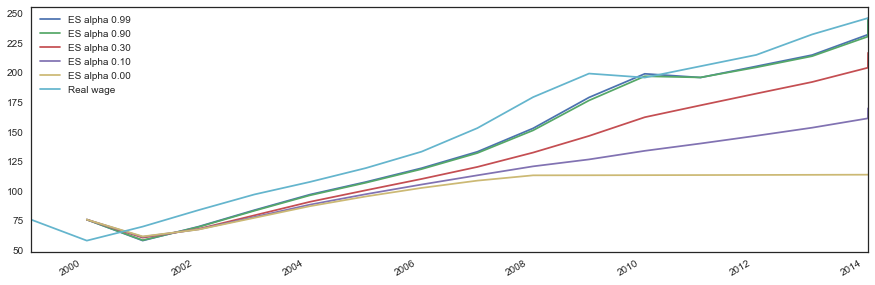

In [21]:
all_frc_data_creation(FRC_TS_ES_wage_ag,train_ts_wage_ag).plot(figsize=(15,5))

### Conclusion: Optimal $\alpha = 0.99$

In [22]:
delay = 1
optimal_alpha = 0.99
adaptation_period = 10
Params={'alpha':optimal_alpha,'AdaptationPeriod':adaptation_period}

optimal_wage_forecast_ag = optimal_forecast(ts_wage_aggregated,ExponentialSmoothing,Params,1)

#### Plotting optimal forecast and real data:

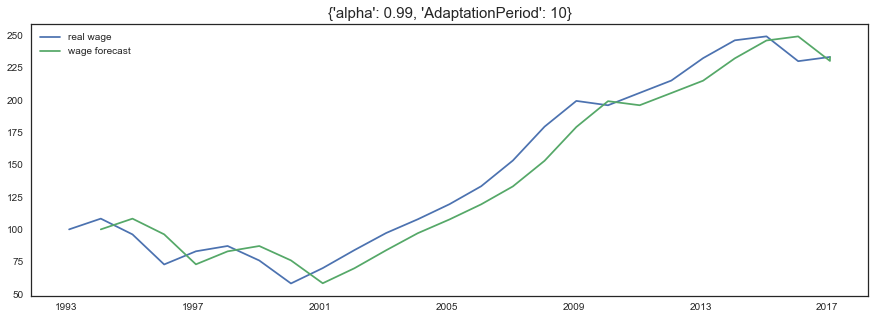

In [23]:
plt.figure(figsize=(15,5))
plt.plot(ts_wage_aggregated, label='real wage')
plt.plot(optimal_wage_forecast_ag,label='wage forecast')
plt.title(Params,fontsize=15)
plt.legend()

#### Accuracy of optimal Alpha

In [24]:
testing_forecast = optimal_wage_forecast_ag['2016-01-01':'2017-01-01']
testing_real = ts_wage_aggregated['2016-01-01':'2017-01-01']
ix = range(len(testing_forecast.index))

loss, _ =  qualityMACAPE(testing_real.iloc[ix], testing_forecast.iloc[ix])
accuracy = 1 - loss
print('Accuracy =','{:0.1f}%'.format(accuracy.values[0]*100))

Accuracy = 92.0%


<h1 align="center">3. Winters model for Additive Seasonality (25%) </h1>
You need to realize ES model for TS with additive seasonality and then use it for forecasting real TS <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">monthly-wage.csv</span>.

Forecast delay $h=1$ for all point in this task.

* 1) Realize Winters model for Seasonal TS (use code from seminar 2 as example)
* 2) Find optimal params $\alpha$ (smoothing of level) and $\gamma$ (smoothing of seasonality) (use data from 09.1998 to 01.2015).(Loss function should be the same as in task 2.)
* 3) Draw forecast with optimal values $\alpha$ and $\gamma$ from 09.1998 to 01.2017. 
* 4) Calculate accuracy of the forecast of TS in [02.2016, 01.2017] (Loss function should be the same as in task 2.). Compare it with accuracy of SES: is it better? 
* \*5) Conclude whether Winter's ES can be used for this TS?

### 3.1 Winters model

In [25]:
def Winters_Additive_Seasonality(series, h, Params):
    series = np.array(series)
    T = len(series)
    alpha = Params['alpha']
    gamma = Params['gamma']
    p = Params['seasonality_period']

    FORECAST = [np.NaN]*(T+h)

    if alpha>1 and gamma>1:
        w.warn('Alpha can not be more than 1')
        w.warn('Gamma can not be more than 1')
        return FORECAST

    if alpha<0 and gamma<0:
        w.warn('Alpha can not be less than 0')
        w.warn('Gamma can not be less than 0')
        return FORECAST
    
    # initialization of level and seasonality
    l = np.mean(series[:p]) # level
    s = series[:p]-l        # seasonality

    for t in range(T):
        if not math.isnan(series[t]):
            if math.isnan(l):
                l = np.mean(series[t:t+p]) 
            if math.isnan(s[t % p]):
                s[t % p] = series[t] - l 
            old_l = l            
            l = alpha*(series[t]-s[t % p]) + (1-alpha)*l
            s[t % p] = gamma*(series[t] - old_l) + (1-gamma)*s[t % p] 
            
        FORECAST[t+h] = l + s[(t+h) % p]
    return FORECAST


### 3.2 Optimal parameters finding

C:\Users\AM000110\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


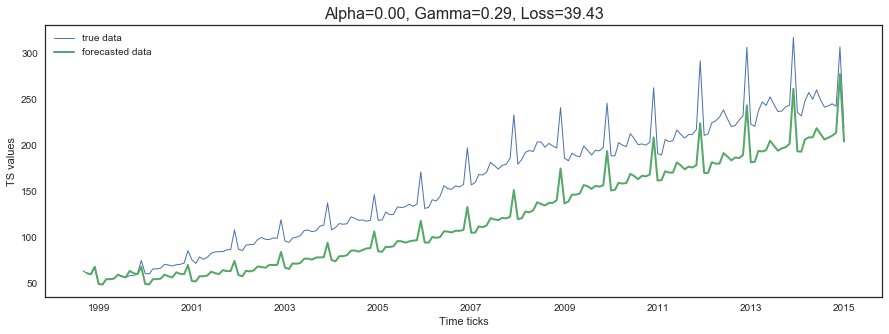

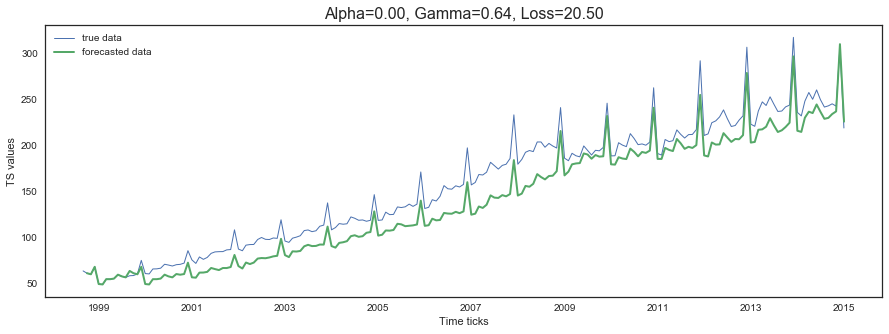

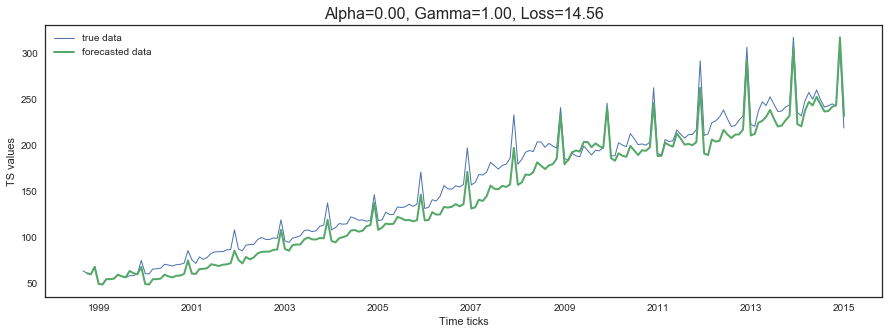

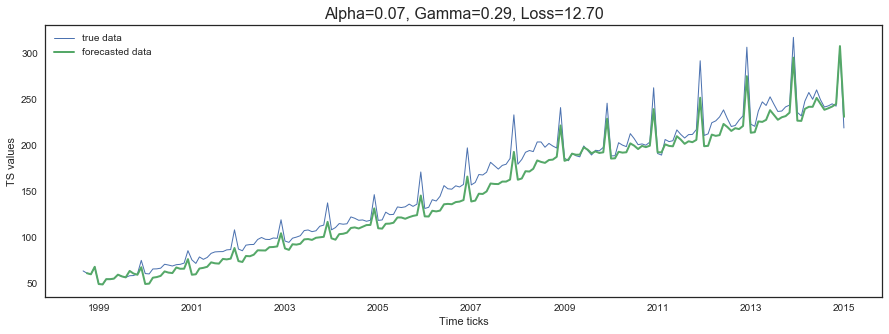

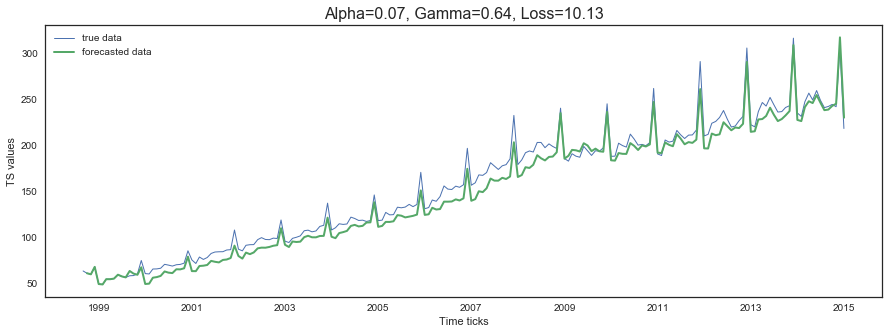

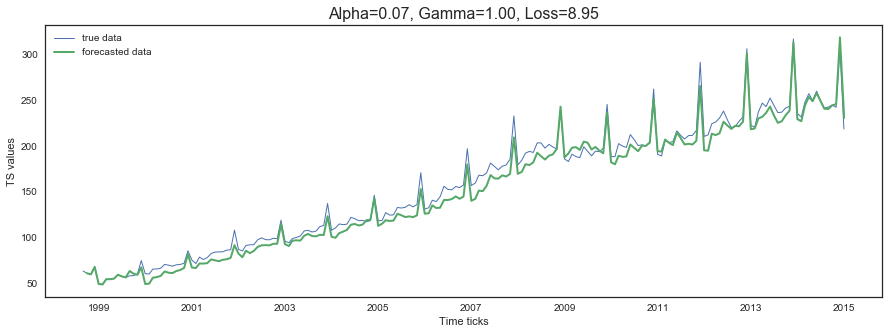

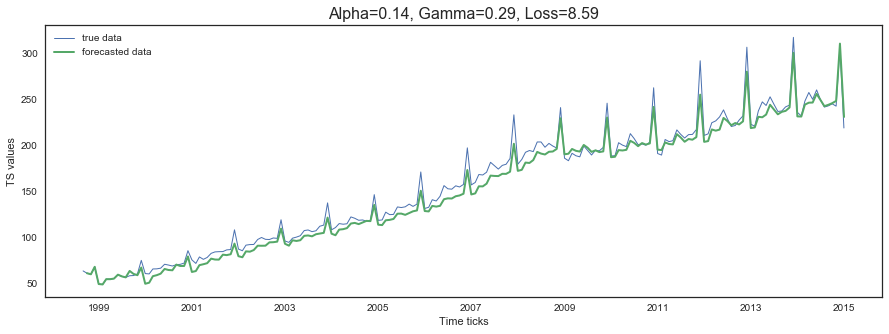

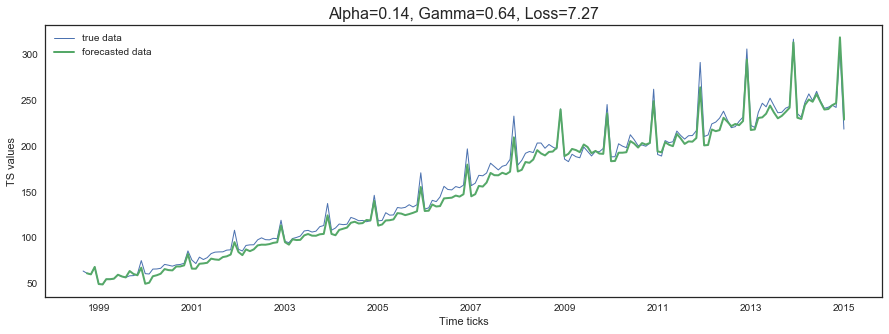

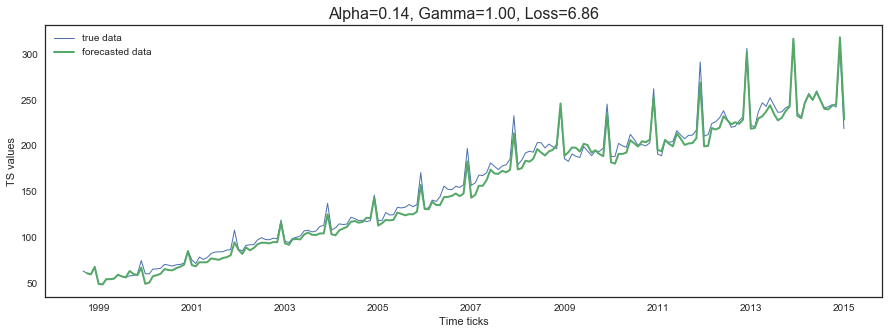

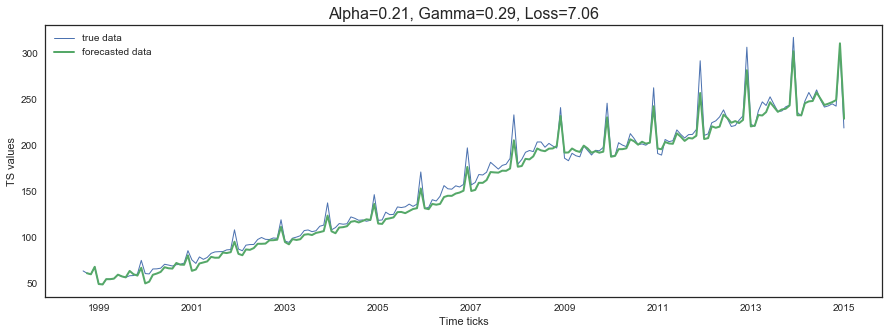

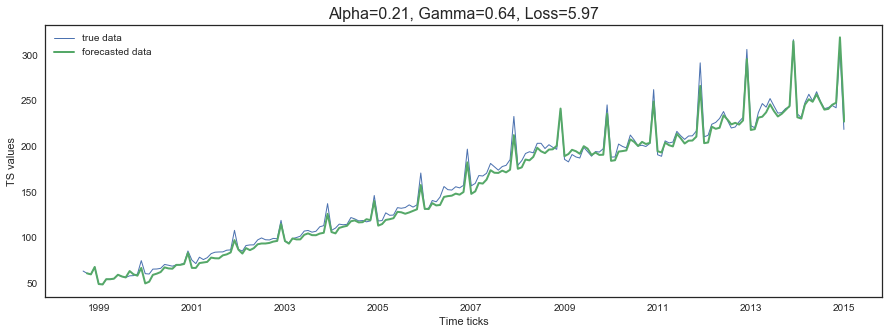

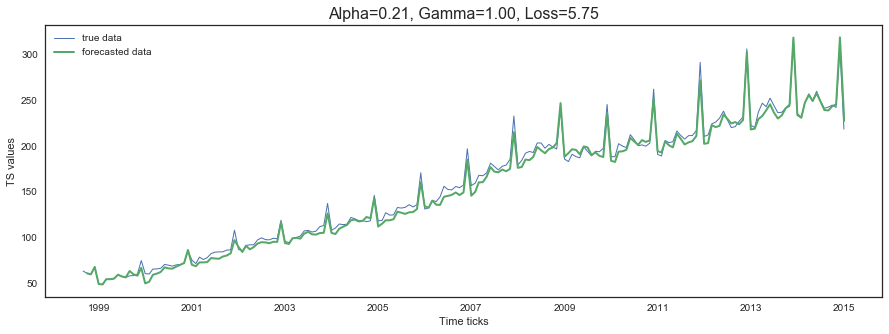

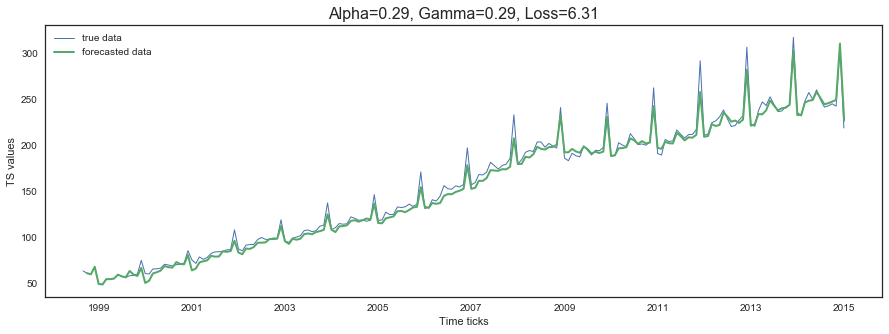

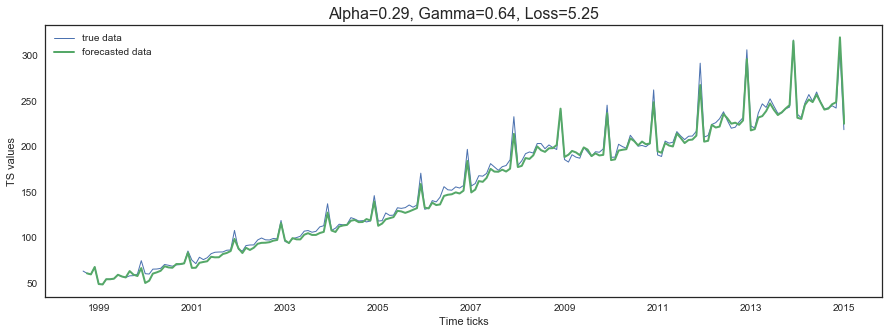

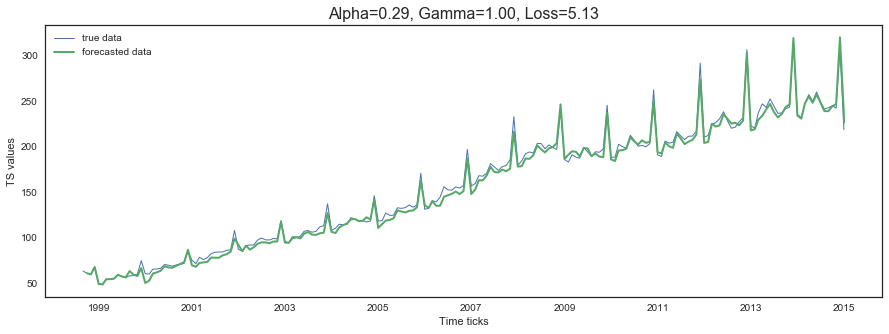

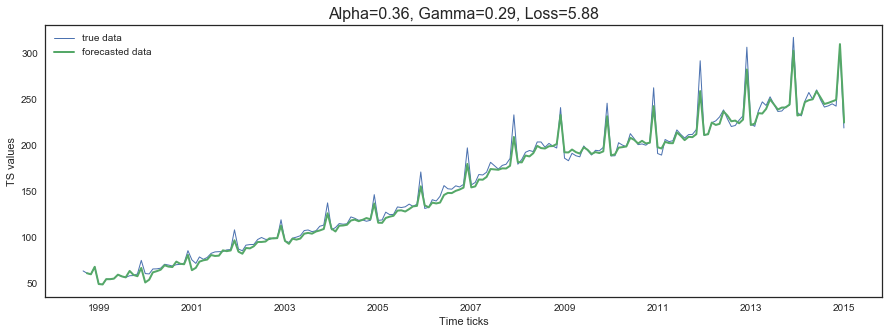

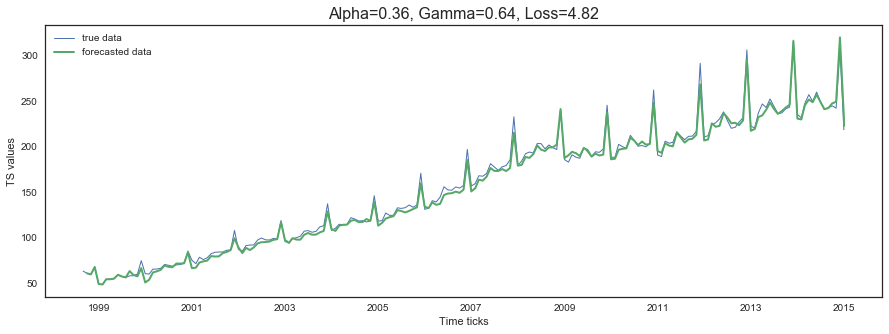

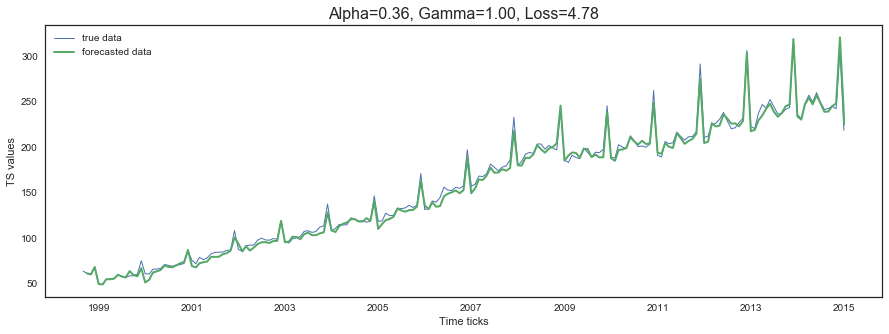

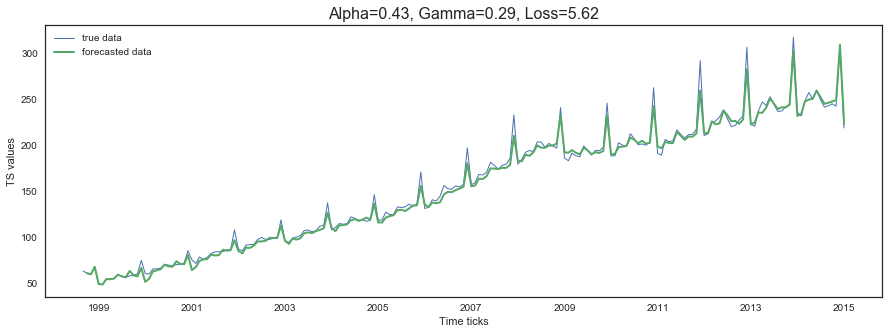

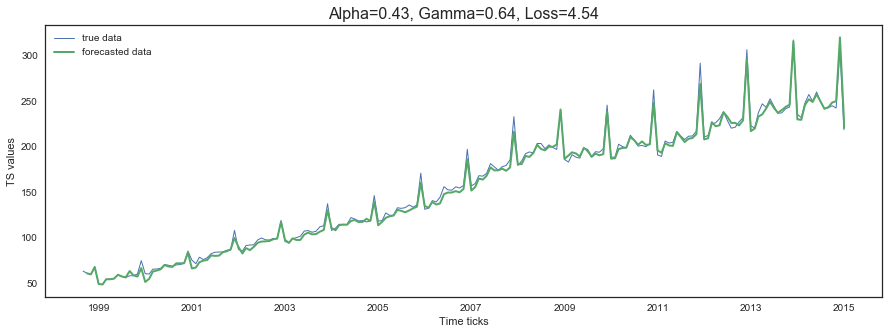

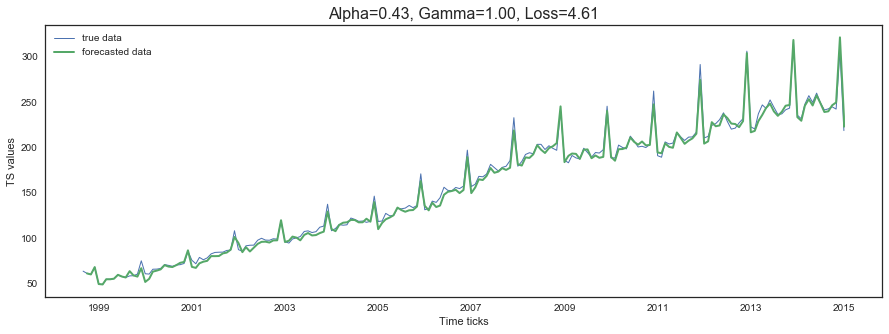

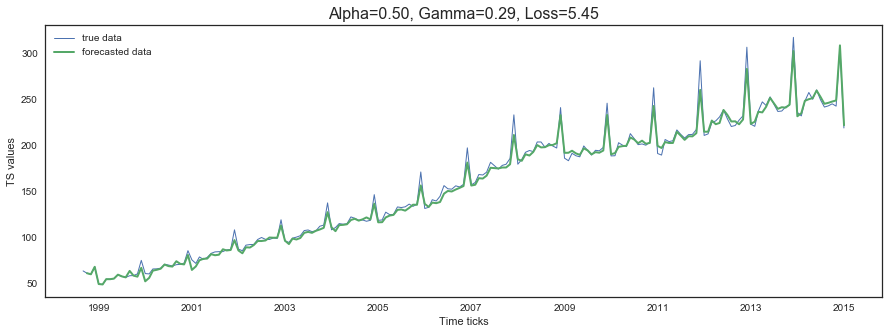

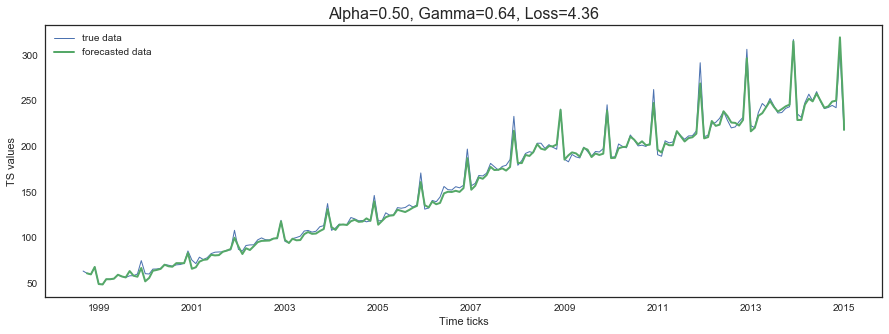

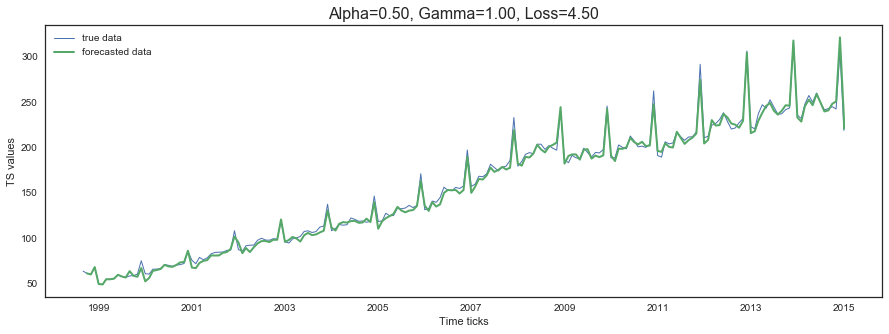

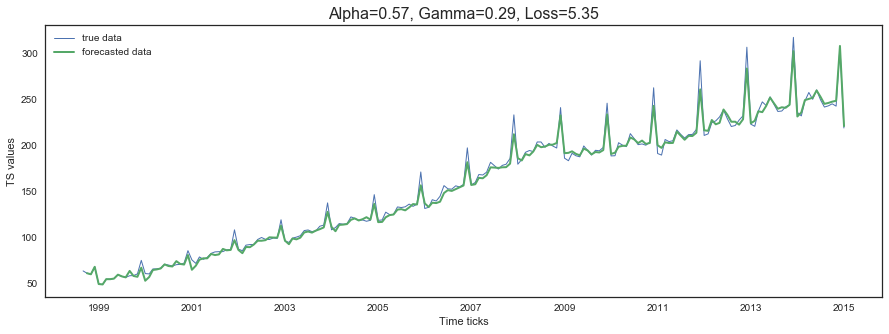

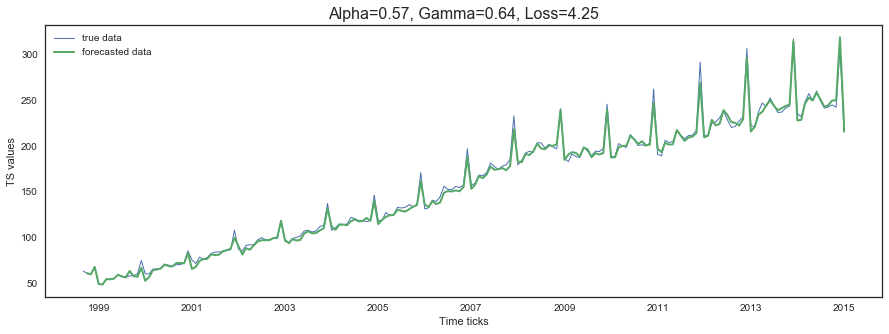

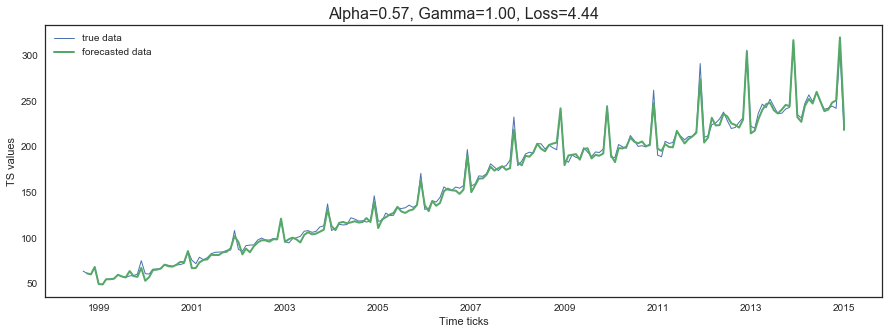

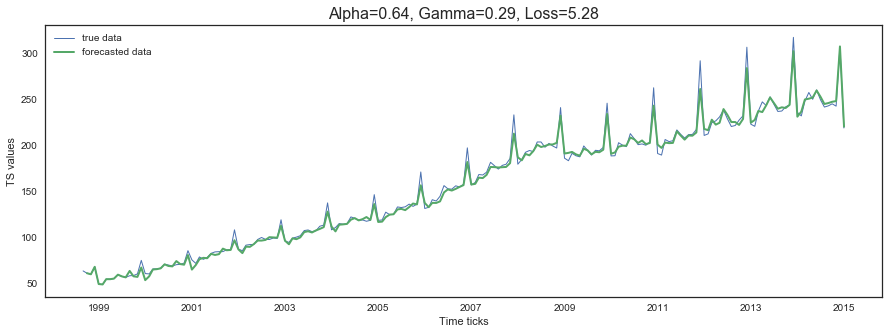

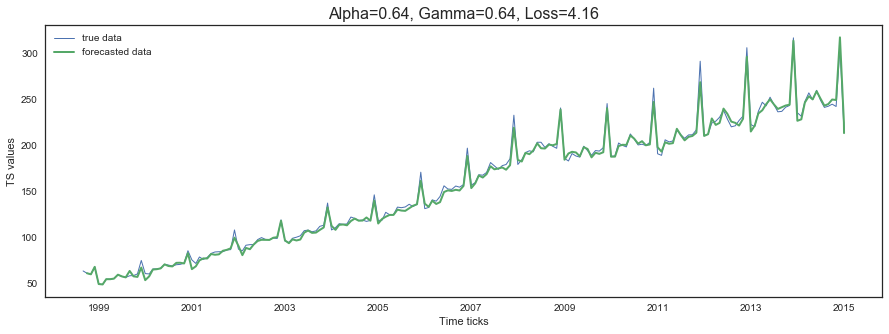

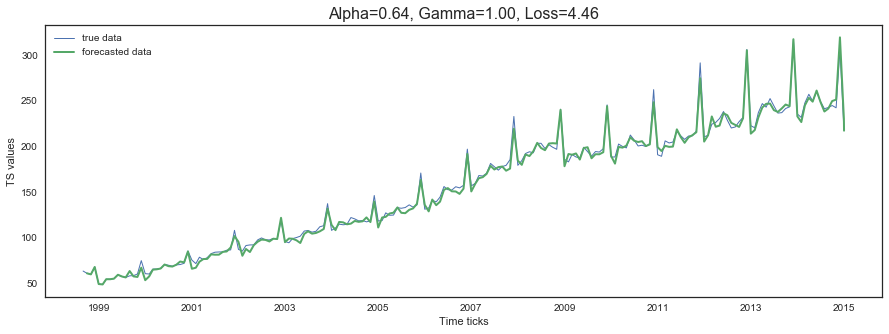

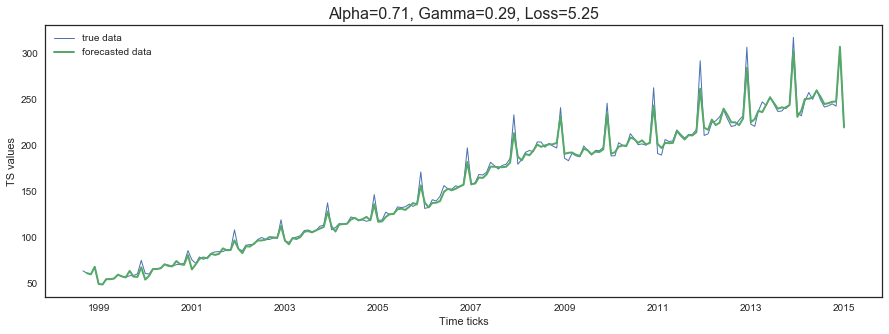

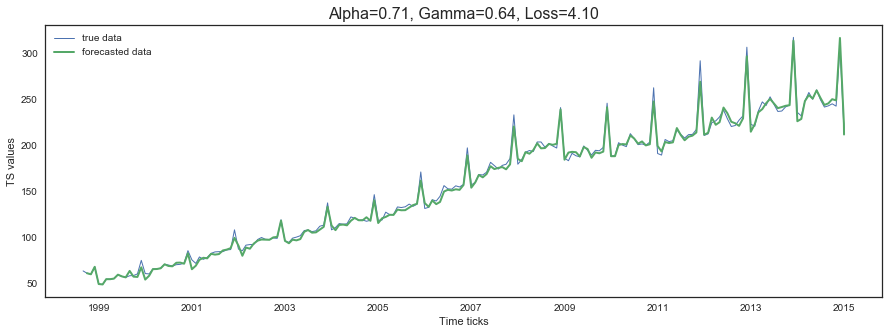

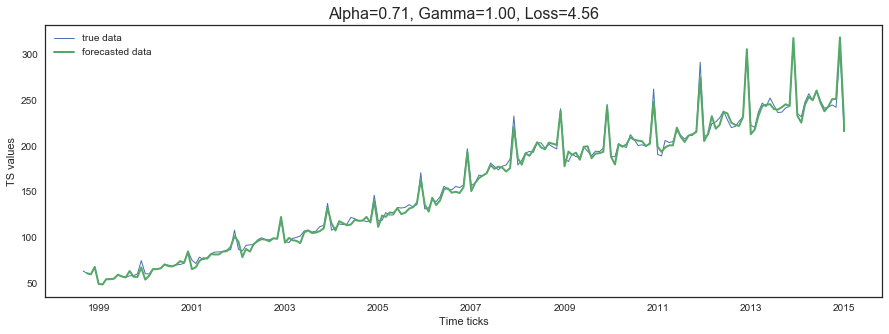

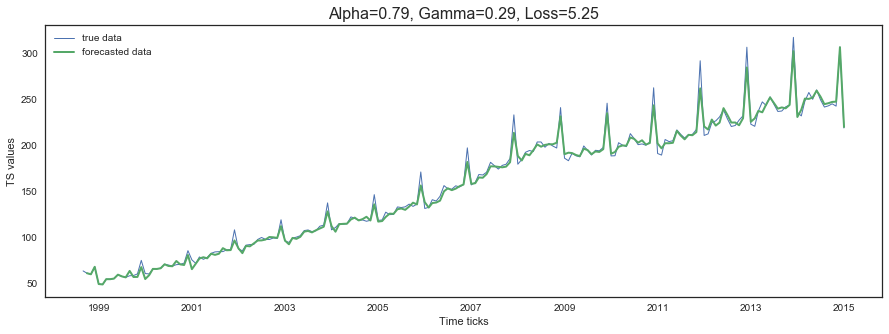

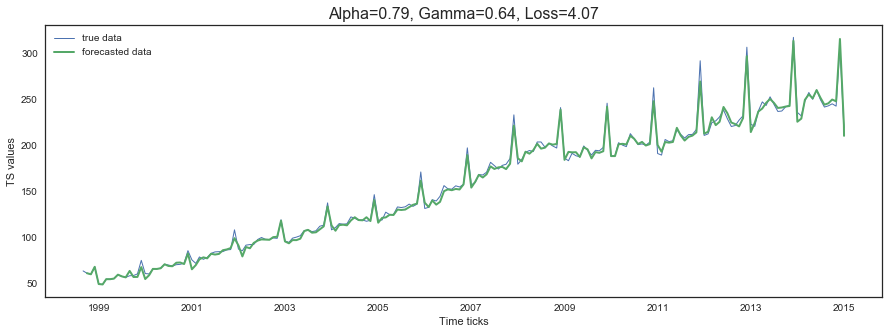

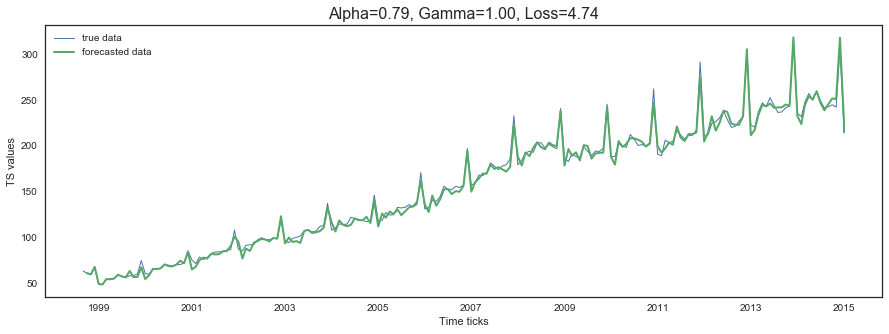

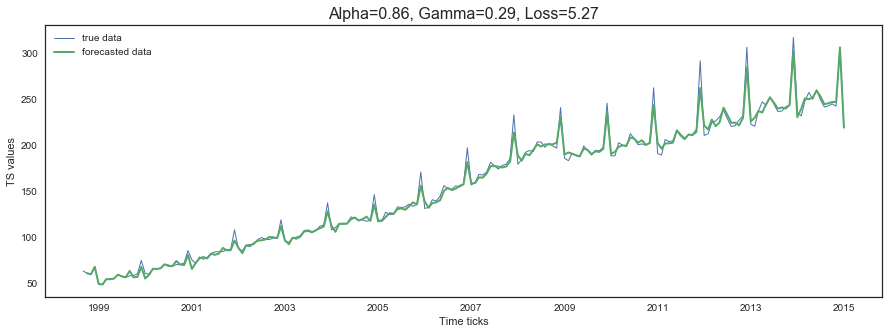

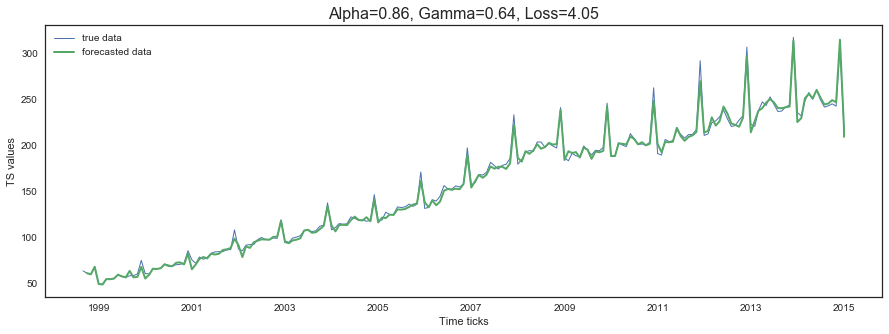

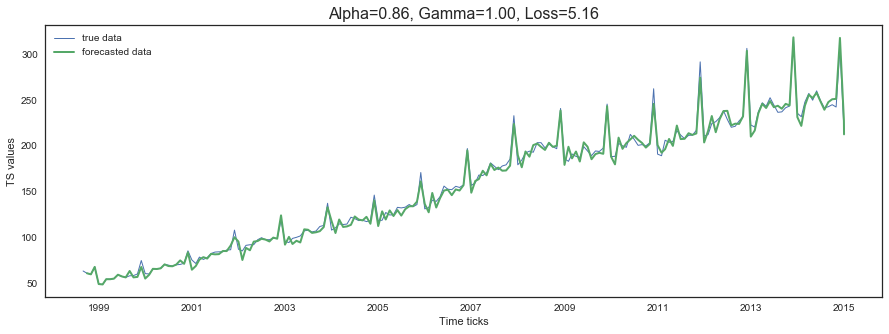

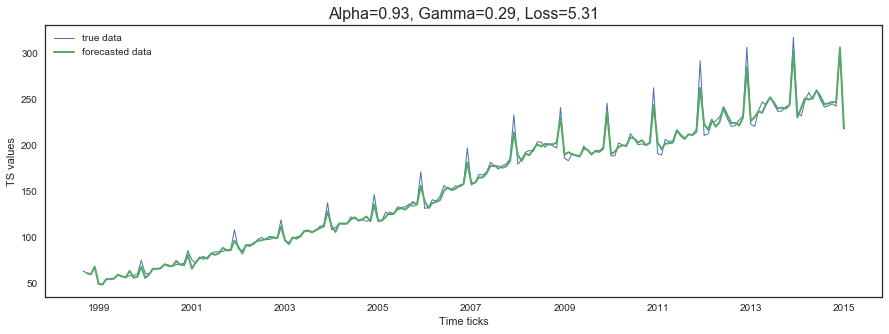

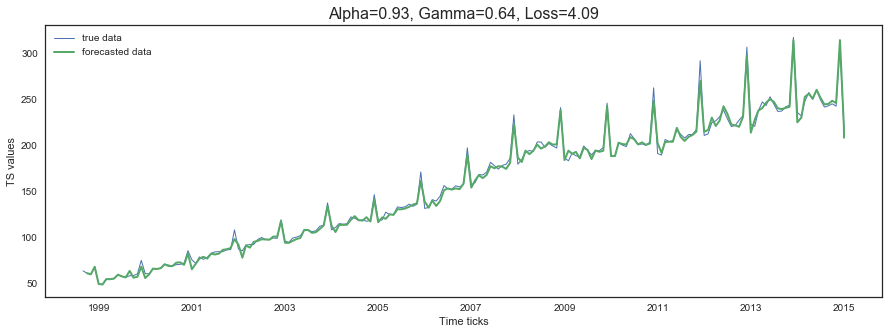

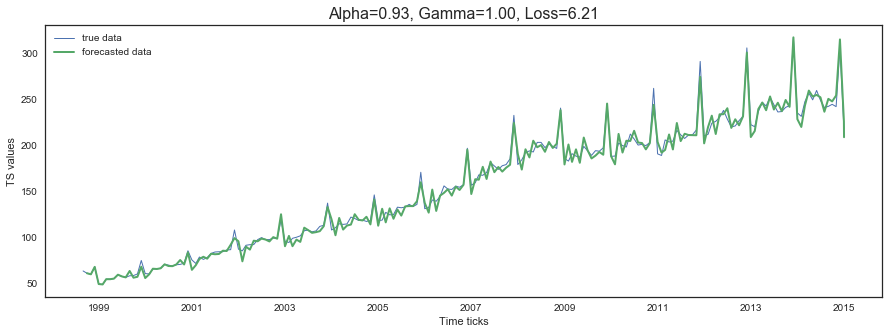

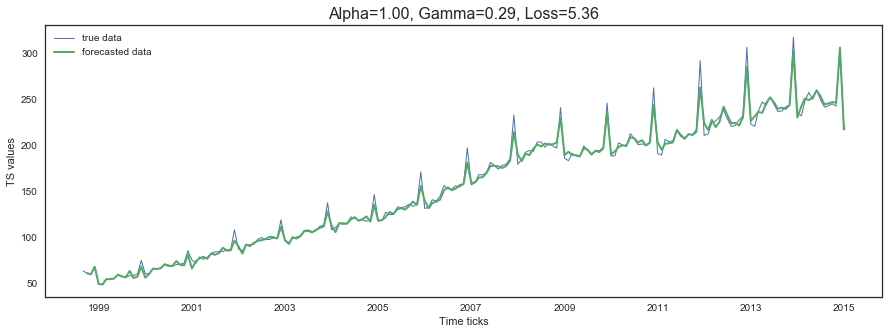

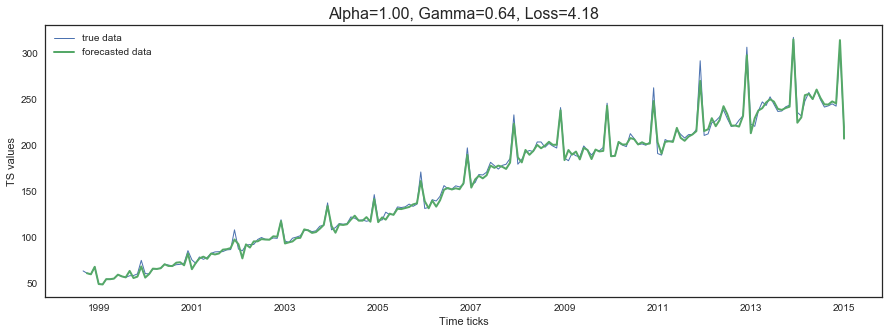

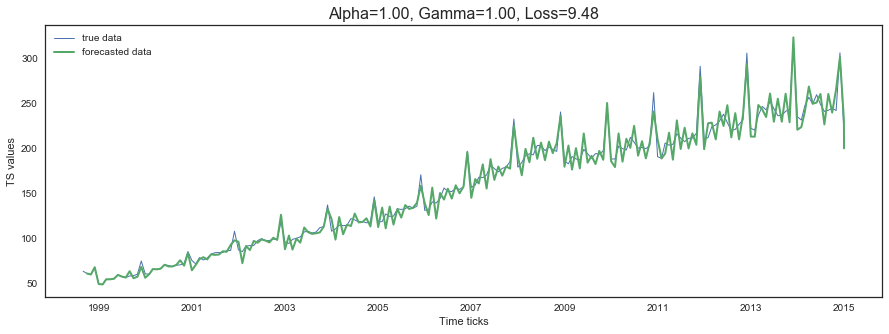

In [26]:
train_ts_wage = ts_wage.loc['1998-09-01': '2015-01-01']
delay=1
ALPHA = list(np.linspace(start=0, stop=1, num=15))
GAMMA = list(np.linspace(start=0, stop=1, num=15))
Seasonality_period = 12
FRC_TS_W_wage = {}
ix = range(len(train_ts_wage.index))

loss_matrix = np.zeros((len(ALPHA)*len(GAMMA),3))
i = 0

for alpha in ALPHA:
    for gamma in GAMMA:
        Params = {}
        frc_ts = empty_frc(data=train_ts_wage,delay=delay)
        Params['alpha']=alpha
        Params['gamma']=gamma
        Params['seasonality_period'] = Seasonality_period
        for cntr in train_ts_wage.columns:
            frc_ts[cntr] = Winters_Additive_Seasonality(train_ts_wage[cntr], delay, Params)
        FRC_TS_W_wage['alpha - {:0.2f}, gamma - {:0.2f} '.format(alpha, gamma)] = frc_ts

        loss,_ = qualityRMSE(train_ts_wage.iloc[ix], frc_ts.iloc[ix])

        loss_matrix[i][0] = loss_matrix[i][0] + alpha
        loss_matrix[i][1] = loss_matrix[i][1] + gamma
        loss_matrix[i][2] = loss_matrix[i][2] + loss
        i = i + 1
        
        if i%5 == 0:
            title = ''
            title = ('Alpha=' + str('{:0.2f}'.format(alpha)) + 
                     ', Gamma=' + str('{:0.2f}'.format(gamma))  +
                     ', Loss=' + str('{:0.2f}'.format(loss.values[0])))
            plt.figure(figsize=(15,5))
            plt.plot(train_ts_wage,linewidth=1.0,label='true data')
            plt.plot(frc_ts,linewidth=2.0, label='forecasted data')
            plt.legend()
            plt.xlabel("Time ticks")
            plt.ylabel("TS values")
            plt.title(title, fontsize=16)

In [27]:
min_loss = np.min(loss_matrix[:,2])
index = np.argmin(loss_matrix[:,2])
optimal_alpha = loss_matrix[index][0]
optimal_gamma = loss_matrix[index][1]
print('optimal_alpha =','{:0.2f}'.format(optimal_alpha),
      'optimal_gamma =','{:0.2f}'.format(optimal_gamma))

optimal_alpha = 0.86 optimal_gamma = 0.64


### Conclusion: Optimal $\alpha = 0.86, \gamma = 0.64$

In [28]:
delay = 1
Seasonality_period = 12
Params={'alpha':optimal_alpha,'gamma':optimal_gamma,'seasonality_period':Seasonality_period}

optimal_wage_forecast = optimal_forecast(ts_wage,Winters_Additive_Seasonality,Params,1)

### 3.3 Plotting optimal forecast and real data:

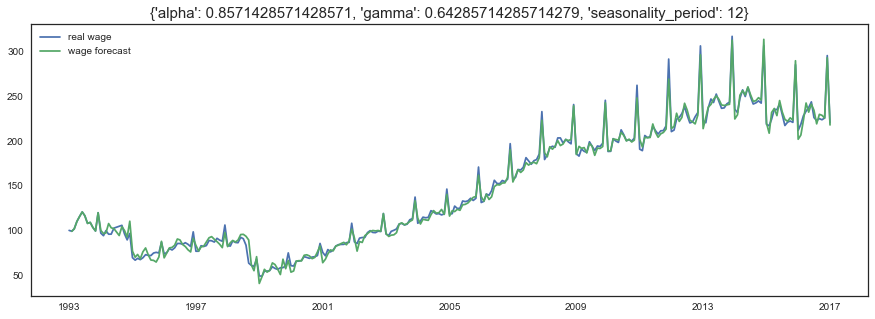

In [29]:
plt.figure(figsize=(15,5))
plt.plot(ts_wage, label='real wage')
plt.plot(optimal_wage_forecast,label='wage forecast')
plt.title(Params,fontsize=15)
plt.legend()

### 3.4 Accuracy of optimal parameters

In [30]:
testing_forecast = optimal_wage_forecast['2016-01-01':'2017-01-01']
testing_real = ts_wage['2016-01-01':'2017-01-01']
ix = range(len(testing_forecast.index))

loss, _ =  qualityMACAPE(testing_real.iloc[ix], testing_forecast.iloc[ix])
accuracy = 1 - loss
print('Accuracy =','{:0.2f}%'.format(accuracy.values[0]*100))

Accuracy = 97.68%


### 3.5 Conclusion

Winter's model gives better results than ES, but it still needs improvements. The main issue with this model is the not taking into consideration the Trend.

<h2 align="left">4. Theil-Wage model for TS with linear trend and seasonality (25%)</h2>
You need to realize Theil-Wage model and then use it for forecasting real TS <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">monthly-wage.csv</span>.

Forecast delay $h=1$ for all point in this task.

* 1) Realize Theil-Wage model for (use code from seminar 2 as example)
* 2) Find optimal params $\alpha$ (smoothing of level), $\beta$ (smoothing trend) and $\gamma$ (smoothing of seasonality) (use data from 09.1998 to 01.2015).(Loss function should be the same as in task 2.)
* 3) Draw forecast with optimal values $\alpha$, $\beta$ and $\gamma$ from 09.1998 to 01.2017. 
* 4) Calculate accuracy of the forecast of TS in [02.2016, 01.2017] (Loss function should be the same as in task 2.). Compare it with accuracy of Winters model: is it better than the last one? 
* \*5) Suggest how can the Theil-Wage model be improved to make accuracy of forecast better?

### 4.1 Theil_Wage model

In [31]:
def Theil_Wage_additive (series, h, Params):
    series = np.array(series)
    T = len(series)
    alpha = Params['alpha']
    betta = Params['betta']
    gamma = Params['gamma']
    p = Params['seasonality_period']

    FORECAST = [np.NaN]*(T+h)

    if alpha>1 and gamma>1 and betta>1:
        w.warn('Alpha can not be more than 1')
        w.warn('Gamma can not be more than 1')
        w.warn('Betta can not be more than 1')
        return FORECAST

    if alpha<0 and gamma<0 and betta<0:
        w.warn('Alpha can not be less than 0')
        w.warn('Gamma can not be less than 0')
        w.warn('Betta can not be less than 0')
        return FORECAST
    
    # initialization of level, trend and seasonality
    l = np.mean(series[:p])                   # level
    b = np.mean(series[p:2*p] - series[:p])/p # trend
    s = series[:p]-l                          # seasonality

    for t in range(T):
        if not math.isnan(series[t]):
            if math.isnan(l):
                l = np.mean(series[t:t+p]) 
            if math.isnan(s[t % p]):
                s[t % p] = series[t] - l 
            old_l = l      
            old_b = b
            l = alpha*(series[t]-s[t % p]) + (1-alpha)*(l+b)
            b = betta*(l - old_l) + (1-betta)*b
            s[t % p] = gamma*(series[t] - old_l - old_b) + (1-gamma)*s[t % p] 
            
        FORECAST[t+h] = l + h*b + s[(t+h) % p]
    return FORECAST


### 4.2 Optimal parameters finding

In [32]:
train_ts_wage = ts_wage.loc['1998-09-01': '2015-01-01']
delay=1
ALPHA = list(np.linspace(start=0, stop=1, num=15))
BETTA = list(np.linspace(start=0, stop=1, num=15))
GAMMA = list(np.linspace(start=0, stop=1, num=15))
Seasonality_period = 12
FRC_TS_TW_wage = {}
ix = range(len(train_ts_wage.index))

loss_matrix = np.zeros((len(ALPHA)*len(BETTA)*len(GAMMA),4))
i = 0

for alpha in ALPHA:
    for betta in BETTA:
        for gamma in GAMMA:
            Params = {}
            frc_ts = empty_frc(data=train_ts_wage,delay=delay)
            Params['alpha']=alpha
            Params['betta']=betta
            Params['gamma']=gamma
            Params['seasonality_period'] = Seasonality_period
            for cntr in train_ts_wage.columns:
                frc_ts[cntr] = Theil_Wage_additive(train_ts_wage[cntr], delay, Params)
            FRC_TS_TW_wage['alpha - {:0.2f}, gamma - {:0.2f} '.format(alpha, gamma)] = frc_ts

            loss,_ = qualityRMSE(train_ts_wage.iloc[ix], frc_ts.iloc[ix])
            
            loss_matrix[i][0] = loss_matrix[i][0] + alpha
            loss_matrix[i][1] = loss_matrix[i][1] + betta
            loss_matrix[i][2] = loss_matrix[i][2] + gamma
            loss_matrix[i][3] = loss_matrix[i][3] + loss
            i = i + 1
            
#             if i % 25 == 0:
#                 title = ''
#                 title = ('Alpha=' + str('{:0.2f}'.format(alpha)) + 
#                          ', Betta=' + str('{:0.2f}'.format(betta)) + 
#                          ', Gamma=' + str('{:0.2f}'.format(gamma)) + 
#                          ', Loss=' + str('{:0.2f}'.format(loss.values[0])))

#                 plt.figure(figsize=(15,5))
#                 plt.plot(train_ts_wage,linewidth=1.0,label='true data')
#                 plt.plot(frc_ts,linewidth=2.0, label='forecasted data')
#                 plt.legend()
#                 plt.xlabel("Time ticks")
#                 plt.ylabel("TS values")
#                 plt.title(title, fontsize=16)

In [33]:
min_loss = np.min(loss_matrix[:,3])
index = np.argmin(loss_matrix[:,3])
optimal_alpha = loss_matrix[index][0]
optimal_betta = loss_matrix[index][1]
optimal_gamma = loss_matrix[index][2]
print('optimal_alpha =','{:0.2f}'.format(optimal_alpha),
      'optimal_betta =','{:0.2f}'.format(optimal_betta),
      'optimal_gamma =','{:0.2f}'.format(optimal_gamma))

optimal_alpha = 0.79 optimal_betta = 0.00 optimal_gamma = 0.64


### Conclusion: Optimal $\alpha = 0.79, \beta = 0.00, \gamma = 0.64$

In [34]:
delay = 1
Seasonality_period = 12
Params={'alpha':optimal_alpha,'betta':optimal_betta,
        'gamma':optimal_gamma,'seasonality_period':Seasonality_period}

optimal_wage_forecast = optimal_forecast(ts_wage,Theil_Wage_additive,Params,1)

### 4.3 Plotting optimal forecast and real data:

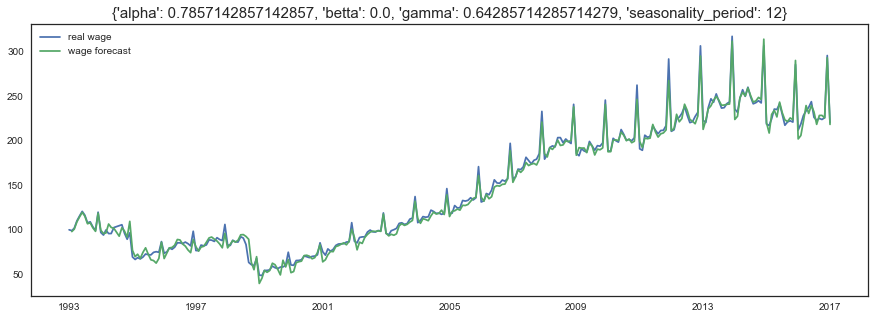

In [35]:
plt.figure(figsize=(15,5))
plt.plot(ts_wage, label='real wage')
plt.plot(optimal_wage_forecast,label='wage forecast')
plt.title(Params,fontsize=15)
plt.legend()

### 4.4 Accuracy of optimal parameters

In [36]:
testing_forecast = optimal_wage_forecast['2016-01-01':'2017-01-01']
testing_real = ts_wage['2016-01-01':'2017-01-01']
ix = range(len(testing_forecast.index))

loss, _ =  qualityMACAPE(testing_real.iloc[ix], testing_forecast.iloc[ix])
accuracy = 1 - loss
print('Accuracy =','{:0.2f}%'.format(accuracy.values[0]*100))

Accuracy = 97.67%


### 4.5 Conclusion

We have almost the same accuracy as in Winters model.

<h2 align="left"> 5. Non-additive model of ES (25%)</h2>
You need to realize some ES-model that include non-addive component (or multiplicative trend or multiplicative component) and then use it for forecasting real TS <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">monthly-wage.csv</span>.

Forecast delay $h=1$ for all point in this task.

* 1) Realize one of following ES models: ESM(A,M) (t.e. Holt-Winters model), ESM(Ad,M), ESM(M,A), ESM(M,M) model.
* 2) Find optimal params of the model (use data from 09.1998 to 01.2015). Note: if you choose damped trend model that $\phi$ you can just set it expetrly (say $0.98$). (Loss function should be the same as in task 2.)
* 3) Draw forecast with optimal values of it's params from 09.1998 to 01.2017. 
* 4) Calculate accuracy of the forecast of TS in [02.2016, 01.2017] (Loss function should be the same as in task 2.). Compare it with accuracy of Winters model and Theil-Wage model: is it better than the last one? 
* 5) Is it true that multiplicative model are more unstable than additive? Unstable means thet forecast is can diver

### 5.1 ESM(Ad,M)

In [37]:
def Ad_trend_M_seasonality (series, h, Params):
    series = np.array(series)
    T = len(series)
    alpha = Params['alpha']
    betta = Params['betta']
    gamma = Params['gamma']
    phi = Params['phi']
    p = Params['seasonality_period']

    FORECAST = [np.NaN]*(T+h)

    if alpha>1 and gamma>1 and betta>1 and phi>1:
        w.warn('Alpha can not be more than 1')
        w.warn('Gamma can not be more than 1')
        w.warn('Betta can not be more than 1')
        w.warn('Phi can not be more than 1')
        return FORECAST

    if alpha<0 and gamma<0 and betta<0 and phi>1:
        w.warn('Alpha can not be less than 0')
        w.warn('Gamma can not be less than 0')
        w.warn('Betta can not be less than 0')
        w.warn('Phi can not be less than 0')
        return FORECAST
    
    # initialization of level, trend and seasonality
    l = np.mean(series[:p])                   # level
    b = np.mean(series[p:2*p] - series[:p])/p # trend
    s = series[:p]/l                          # seasonality
    phi_h = 0
    
    for t in range(T):
        if not math.isnan(series[t]):
            if math.isnan(l):
                l = np.mean(series[t:t+p]) 
            if math.isnan(s[t % p]):
                s[t % p] = series[t] - l 
            old_l = l
            old_b = b
            l = alpha*(series[t]/s[t % p]) + (1-alpha)*(l+phi*b)
            b = betta*(l - old_l) + (1-betta)*phi*b
            s[t % p] = gamma*(series[t]/(old_l + phi*old_b)) + (1-gamma)*s[t % p] 
          
        for j in range(h):
            phi_h = phi_h + phi**j
        phi_h = phi_h*phi
        FORECAST[t+h] = (l + phi_h*b)*s[(t+h) % p]
    return FORECAST


### 5.2 Optimal parameters finding

In [38]:
train_ts_wage = ts_wage.loc['1998-09-01': '2015-01-01']
delay=1
ALPHA = list(np.linspace(start=0, stop=1, num=15))
BETTA = list(np.linspace(start=0, stop=1, num=15))
GAMMA = list(np.linspace(start=0, stop=1, num=15))
PHI = list(np.linspace(start=0, stop=1, num=15))
Seasonality_period = 12
FRC_TS_AdM_wage = {}
ix = range(len(train_ts_wage.index))

loss_matrix = np.zeros((len(ALPHA)*len(BETTA)*len(GAMMA)*len(PHI),5))
i = 0

for alpha in ALPHA:
    for betta in BETTA:
        for gamma in GAMMA:
            for phi in PHI:
                Params = {}
                frc_ts = empty_frc(data=train_ts_wage,delay=delay)
                Params['alpha']=alpha
                Params['betta']=betta
                Params['gamma']=gamma
                Params['seasonality_period']=Seasonality_period
                Params['phi']=phi
                for cntr in train_ts_wage.columns:
                    frc_ts[cntr] = Ad_trend_M_seasonality(train_ts_wage[cntr], delay, Params)
                FRC_TS_AdM_wage['alpha - {:0.2f}, gamma - {:0.2f} '.format(alpha, gamma)] = frc_ts

                loss,_ = qualityRMSE(train_ts_wage.iloc[ix], frc_ts.iloc[ix])

                loss_matrix[i][0] = loss_matrix[i][0] + alpha
                loss_matrix[i][1] = loss_matrix[i][1] + betta
                loss_matrix[i][2] = loss_matrix[i][2] + gamma
                loss_matrix[i][3] = loss_matrix[i][3] + phi
                loss_matrix[i][4] = loss_matrix[i][4] + loss
                i = i + 1
            
#             if i % 25 == 0:
#                 title = ''
#                 title = ('Alpha=' + str('{:0.2f}'.format(alpha)) + 
#                          ', Betta=' + str('{:0.2f}'.format(betta)) + 
#                          ', Gamma=' + str('{:0.2f}'.format(gamma)) + 
#                             ', Phi=' + str('{:0.2f}'.format(phi)) + 
#                          ', Loss=' + str('{:0.2f}'.format(loss.values[0])))

#                 plt.figure(figsize=(15,5))
#                 plt.plot(train_ts_wage,linewidth=1.0,label='true data')
#                 plt.plot(frc_ts,linewidth=2.0, label='forecasted data')
#                 plt.legend()
#                 plt.xlabel("Time ticks")
#                 plt.ylabel("TS values")
#                 plt.title(title, fontsize=16)

In [54]:
min_loss = np.min(loss_matrix[:,4])
index = np.argmin(loss_matrix[:,4])
optimal_alpha = loss_matrix[index][0]
optimal_betta = loss_matrix[index][1]
optimal_gamma = loss_matrix[index][2]
optimal_phi = loss_matrix[index][3]
print('optimal_alpha =','{:0.2f}'.format(optimal_alpha),
      'optimal_betta =','{:0.2f}'.format(optimal_betta),
      'optimal_gamma =','{:0.2f}'.format(optimal_gamma),
      'optimal_phi =','{:0.2f}'.format(optimal_phi))

optimal_alpha = 0.50 optimal_betta = 0.07 optimal_gamma = 0.43 optimal_phi = 0.79


### Conclusion: Optimal $\alpha = 0.50, \beta = 0.07, \gamma = 0.43, \phi=0.79$

In [40]:
delay = 1
Seasonality_period = 12
Params={'alpha':optimal_alpha,'betta':optimal_betta,
        'gamma':optimal_gamma,'phi':optimal_phi,
        'seasonality_period':Seasonality_period}

optimal_wage_forecast = optimal_forecast(ts_wage,Ad_trend_M_seasonality,Params,1)

### 5.3 Plotting optimal forecast and real data:

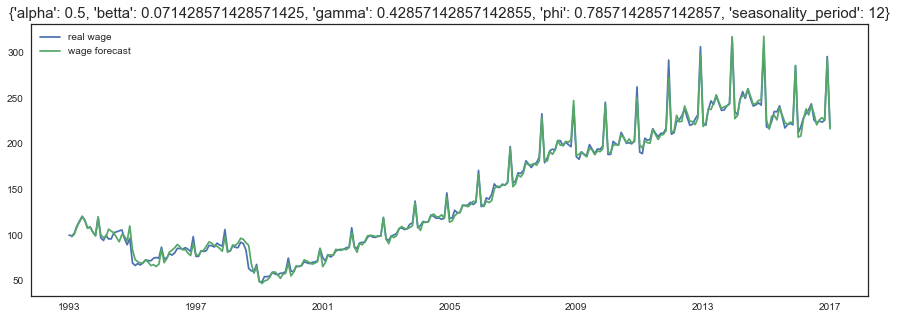

In [41]:
plt.figure(figsize=(15,5))
plt.plot(ts_wage, label='real wage')
plt.plot(optimal_wage_forecast,label='wage forecast')
plt.title(Params,fontsize=15)
plt.legend()

### 5.4 Accuracy of optimal parameters

In [42]:
testing_forecast = optimal_wage_forecast['2016-01-01':'2017-01-01']
testing_real = ts_wage['2016-01-01':'2017-01-01']
ix = range(len(testing_forecast.index))

loss, _ =  qualityMACAPE(testing_real.iloc[ix], testing_forecast.iloc[ix])
accuracy = 1 - loss
print('Accuracy =','{:0.2f}%'.format(accuracy.values[0]*100))

Accuracy = 98.29%


#### The best result gives the multiplicative model.

###### Residuals:

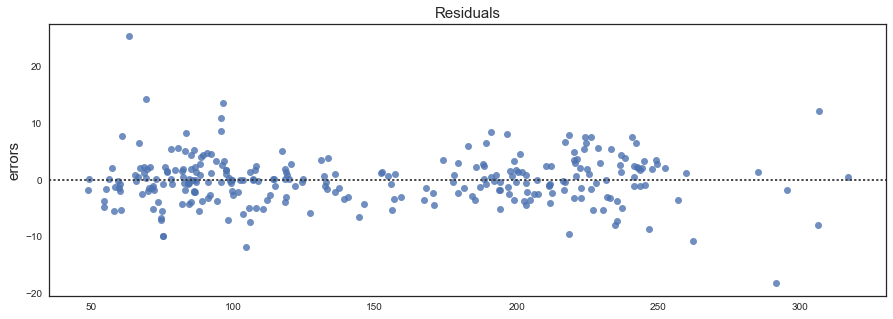

In [43]:
plt.figure(figsize=(15,5))
sns.residplot(ts_wage['1993-09-01': '2017-01-01'],optimal_wage_forecast['1993-09-01': '2017-01-01'])
plt.title("Residuals", fontsize=15)
plt.ylabel('errors', fontsize =15)

### 5.5 Stability checking

In [44]:
from mpl_toolkits.mplot3d import Axes3D

In [49]:
train_ts_wage = ts_wage.loc['1998-09-01': '2015-01-01']
delay=1
Seasonality_period = 12
ix = range(len(train_ts_wage.index))

stability_matrix_AdM_S = np.zeros((len(ALPHA)*len(GAMMA),3))
stability_matrix_TW_S = np.zeros((len(ALPHA)*len(GAMMA),3))
i = 0

for alpha in ALPHA:
    for gamma in GAMMA:
        Params_AdM_S = {}
        frc_ts_AdM_S = empty_frc(data=train_ts_wage,delay=delay)
        Params_AdM_S['alpha']=alpha
        Params_AdM_S['betta']=optimal_betta
        Params_AdM_S['gamma']=gamma
        Params_AdM_S['seasonality_period']=Seasonality_period
        Params_AdM_S['phi']=optimal_phi
        for cntr in train_ts_wage.columns:
            frc_ts_AdM_S[cntr] = Ad_trend_M_seasonality(train_ts_wage[cntr], delay, Params_AdM_S)

        loss_AdM_S,_ = qualityRMSE(train_ts_wage.iloc[ix], frc_ts_AdM_S.iloc[ix])

        stability_matrix_AdM_S[i][0] = stability_matrix_AdM_S[i][0] + alpha
        stability_matrix_AdM_S[i][1] = stability_matrix_AdM_S[i][1] + gamma
        stability_matrix_AdM_S[i][2] = stability_matrix_AdM_S[i][2] + loss_AdM_S
        
        Params_TW_S = {}
        frc_ts_TW_S = empty_frc(data=train_ts_wage,delay=delay)
        Params_TW_S['alpha']=alpha
        Params_TW_S['betta']=0.00
        Params_TW_S['gamma']=gamma
        Params_TW_S['seasonality_period']=Seasonality_period
        for cntr in train_ts_wage.columns:
            frc_ts_TW_S[cntr] = Theil_Wage_additive(train_ts_wage[cntr], delay, Params_TW_S)

        loss_TW_S,_ = qualityRMSE(train_ts_wage.iloc[ix], frc_ts_TW_S.iloc[ix])

        stability_matrix_TW_S[i][0] = stability_matrix_TW_S[i][0] + alpha
        stability_matrix_TW_S[i][1] = stability_matrix_TW_S[i][1] + gamma
        stability_matrix_TW_S[i][2] = stability_matrix_TW_S[i][2] + loss_TW_S
        
        i = i + 1

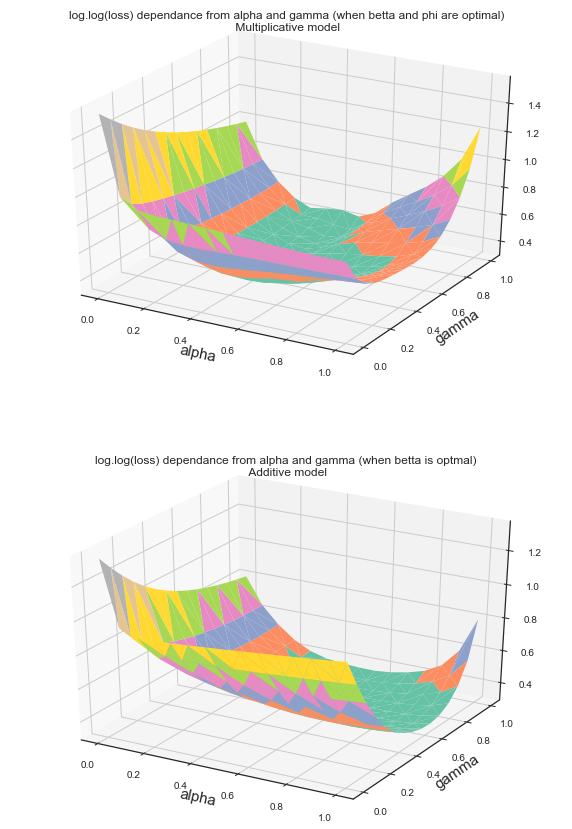

In [50]:
fig = plt.figure(figsize=(10,15))
ax = fig.add_subplot(211, projection='3d')
ax.plot_trisurf(stability_matrix_AdM_S[:,0],stability_matrix_AdM_S[:,1],
                np.log(np.log(stability_matrix_AdM_S[:,2])), cmap = 'Set2')
plt.xlabel('alpha',fontsize=15)
plt.ylabel('gamma',fontsize=15)
plt.title('log.log(loss) dependance from alpha and gamma (when betta and phi are optimal)'
         '\n Multiplicative model')

ax = fig.add_subplot(212, projection='3d')
ax.plot_trisurf(stability_matrix_TW_S[:,0],stability_matrix_TW_S[:,1],
                np.log(np.log(stability_matrix_TW_S[:,2])), cmap = 'Set2')
plt.xlabel('alpha',fontsize=15)
plt.ylabel('gamma',fontsize=15)
plt.title('log.log(loss) dependance from alpha and gamma (when betta is optmal)'
         '\n Additive model')

#### from the graph we can see that multiplicative model is less stable than additive one (this one is more smoothed)

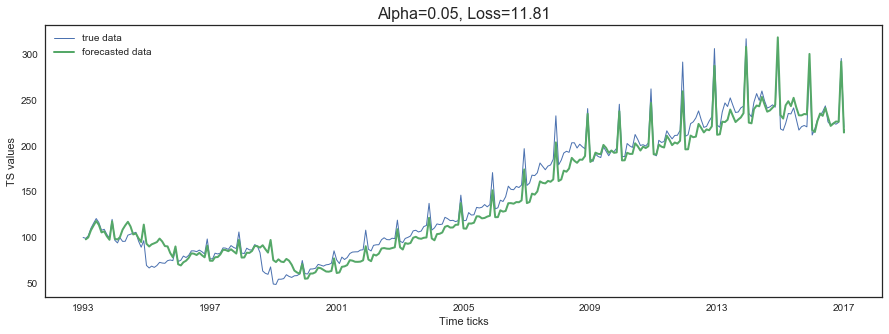

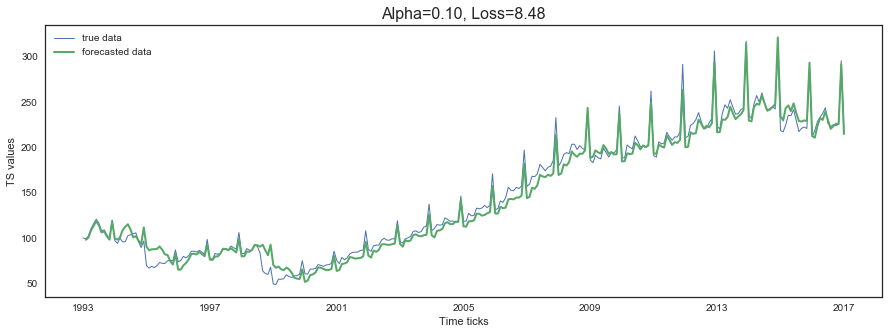

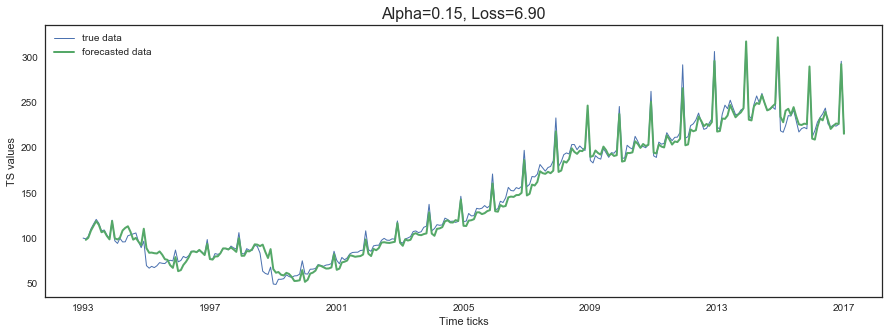

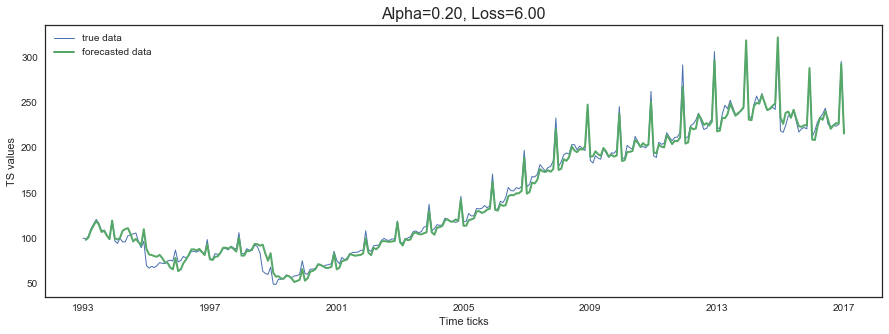

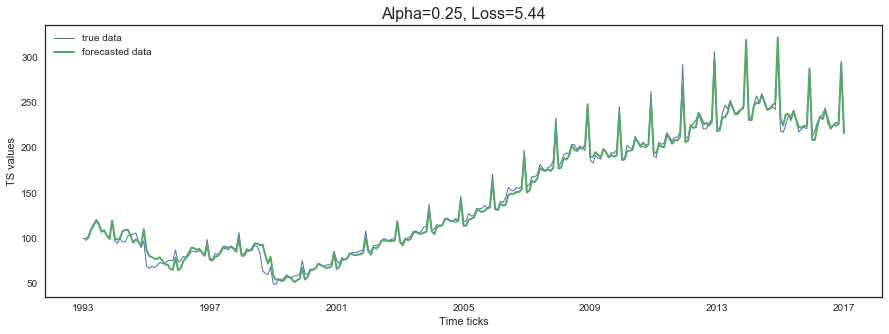

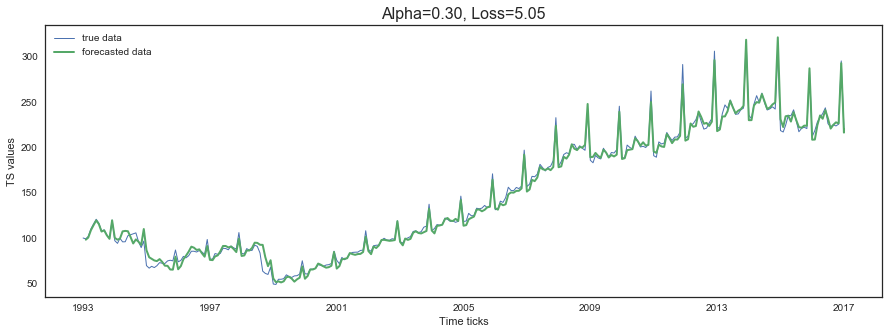

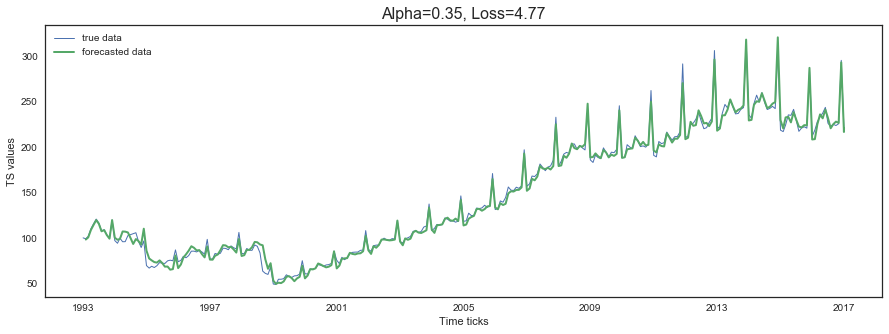

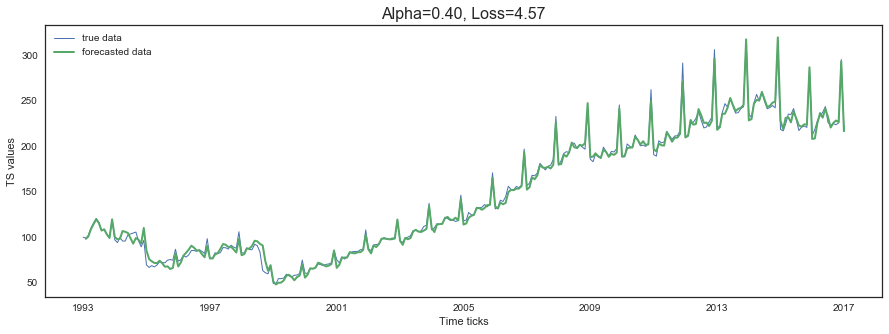

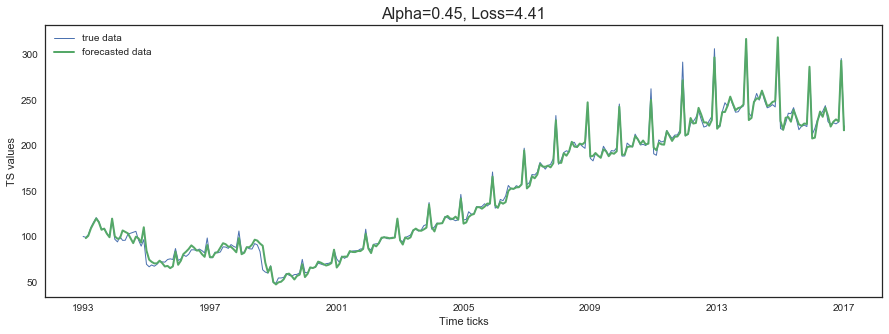

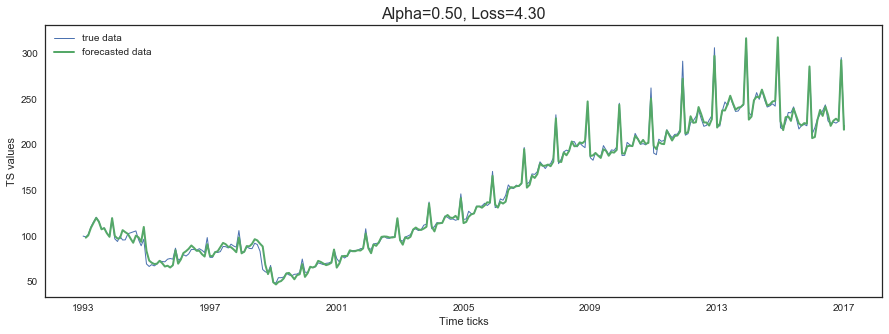

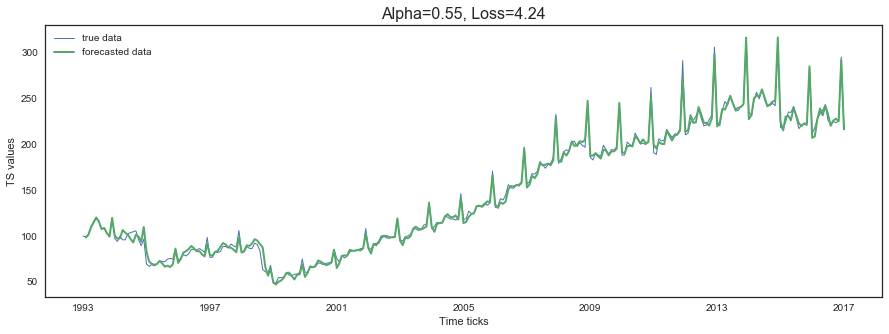

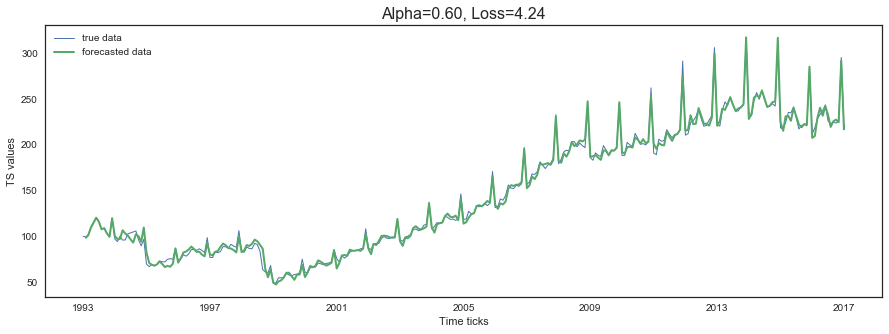

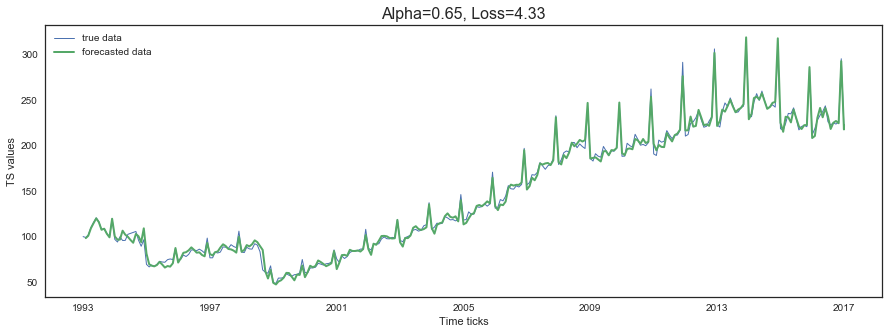

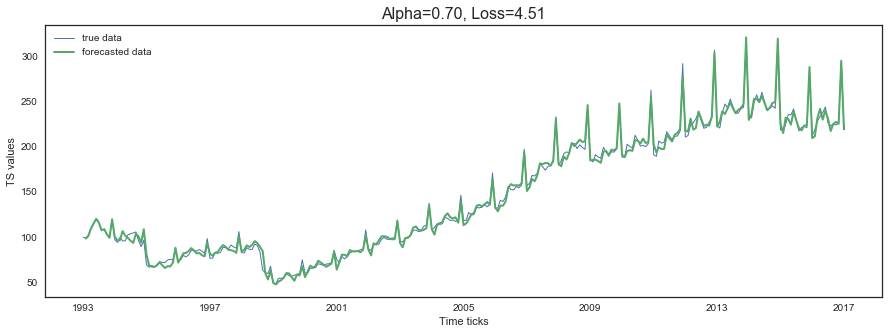

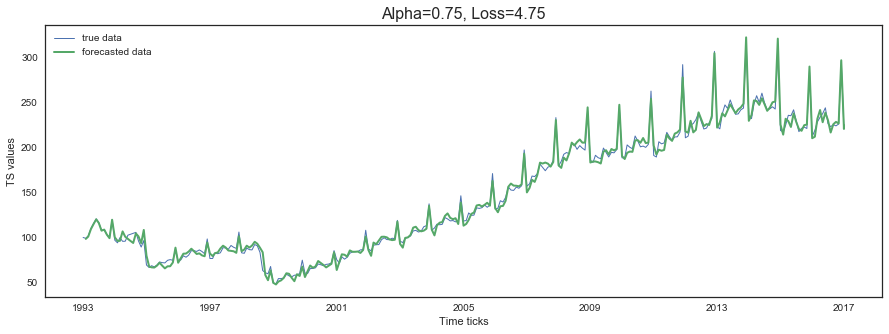

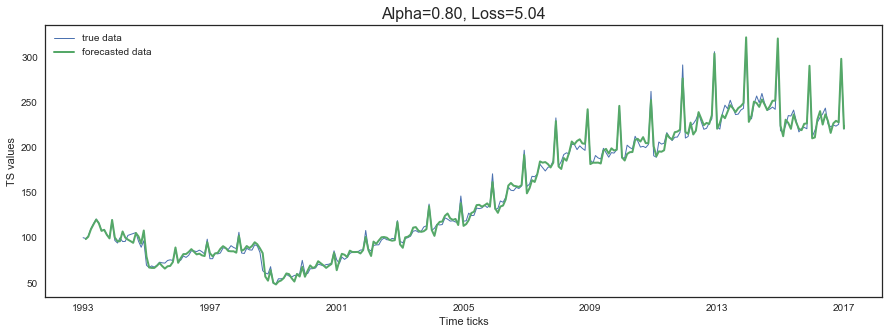

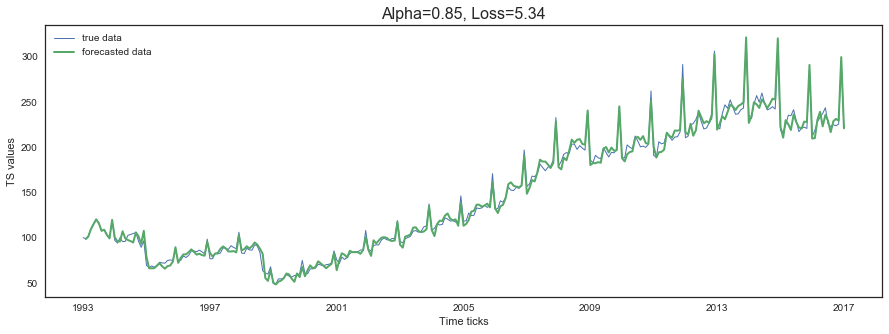

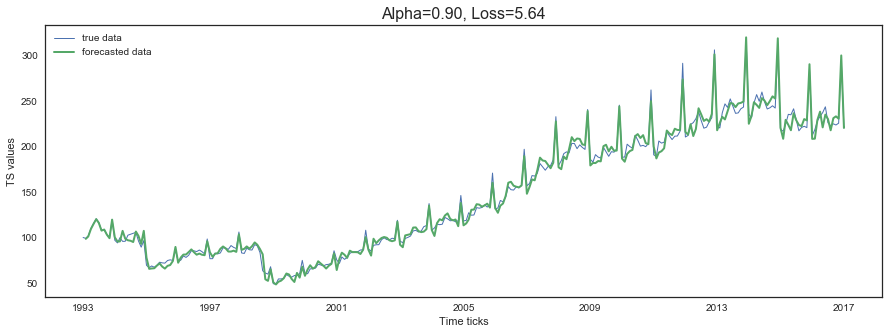

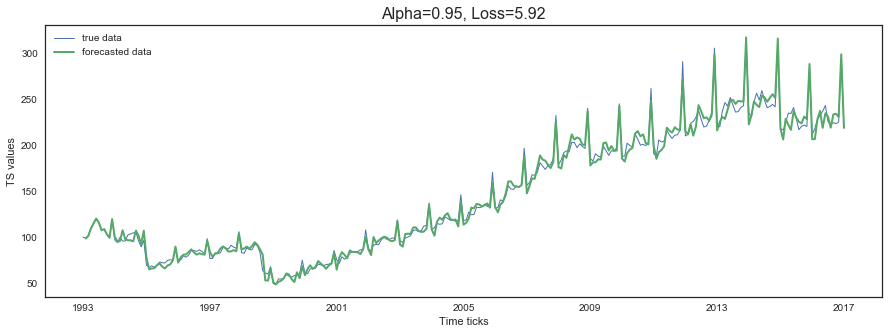

In [51]:
delay=1
Seasonality_period = 12
deviation = 0.05
ix = range(len(ts_wage.index))

loss_plot = []
alpha_plot = []

ALPHA_deviation = [optimal_alpha]
for i in range(1,10):
    ALPHA_deviation.append(optimal_alpha+i*deviation)
    ALPHA_deviation.append(optimal_alpha-i*deviation)
ALPHA_deviation = list(np.sort(ALPHA_deviation))
    
for alpha in ALPHA_deviation:
    Params = {}
    frc_ts = empty_frc(data=ts_wage,delay=delay)
    Params['alpha']=alpha
    Params['betta']=optimal_betta
    Params['gamma']=optimal_gamma
    Params['seasonality_period']=Seasonality_period
    Params['phi']=optimal_phi
    for cntr in ts_wage.columns:
        frc_ts[cntr] = Ad_trend_M_seasonality(ts_wage[cntr], delay, Params)

    loss,_ = qualityRMSE(ts_wage.iloc[ix], frc_ts.iloc[ix])
        
    loss_plot.append(loss)
    alpha_plot.append(alpha)
    title = ''
    title = ('Alpha=' + str('{:0.2f}'.format(alpha)) + 
             ', Loss=' + str('{:0.2f}'.format(loss.values[0])))
    plt.figure(figsize=(15,5))
    plt.plot(ts_wage,linewidth=1.0,label='true data')
    plt.plot(frc_ts,linewidth=2.0, label='forecasted data')
    plt.legend()
    plt.xlabel("Time ticks")
    plt.ylabel("TS values")
    plt.title(title, fontsize=16)

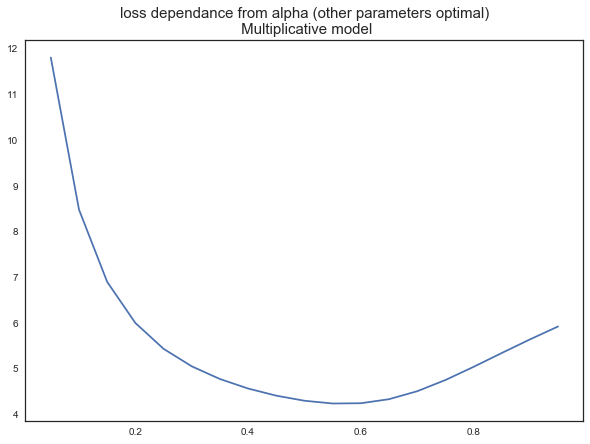

In [52]:
plt.figure(figsize=(10,7))
plt.plot(alpha_plot,loss_plot)
plt.title('loss dependance from alpha (other parameters optimal)'
         '\n Multiplicative model',fontsize = 15)